<a href="https://colab.research.google.com/github/ibenak/Yandex/blob/main/vv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#загрузка библиотек
!pip install wordcloud
!pip install openpyxl
!pip install pymystem3
# Необходимые библиотеки для исследования.
import pandas as pd                                         # для анализа данных
import numpy as np                                          # для математических вычислений
import math as mth                                          # для математических вычислений

import seaborn as sns                                       # для визуализации данных
import matplotlib.pyplot as plt                             # для визуализации
import plotly.express as px                                 # для визуализации
%matplotlib inline
from plotly import graph_objects as go

import datetime as dt                                       # для преобразования к типу данных 'дата'
import requests                                             # для HTTP запросов
import re                                                   # для работы с регулярными выражениями

                               
from collections import Counter                             # для подсчёта числа лемматизированных слов  

import scipy.stats as stats
from scipy import stats as st                               # для высокоуровневых математических вычислений 

# Машинное обучение в Python.
from sklearn.preprocessing import StandardScaler            # для стандартизации данных
from sklearn.cluster import KMeans                          # K-Means кластеризация
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage     # кластеризация

from collections import Counter


import warnings                                             # для предупреждений в программе 
warnings.filterwarnings('ignore')                           # фильтр предупреждений


pd.options.display.float_format = '{:.2f}'.format

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#загрузка дф с общими продажами по каждой точке
df = pd.read_csv('/content/drive/MyDrive/vkusvill/Копия df_tg_v2.csv')

In [ ]:
df.head(3)

,checkuid,id_tt_cl,id_tov_cl,price_retail,quantity,baseprice,basesum,date_ch,time_ch,order_type,low_sale,month,name_tov,id_group,name_gr,id_group2,name_gr2
0,EF41A20A-7791-EC11-9064-005056A7A8DF,10864,20698,190.91,1.00,152.73,152.73,2022-02-19,14:15:15.0000000,offline,0,2,"Творог ""Пластовой"" из цельного молока",33.00,Молочная Продукция,10855.00,Творог классика
1,74FCDBB4-A991-EC11-9064-005056A7A8DF,10864,20738,195.83,1.00,156.67,141.00,2022-02-19,20:20:23.0000000,offline,0,2,"Наполнитель для кошачьего туалета, комкующийся",10245.00,Товары для животных,10889.00,Сопутствующие товары
2,BDD56F5F-8E91-EC11-9064-005056A7A8DF,10864,20738,195.83,1.00,195.83,195.83,2022-02-19,17:05:33.0000000,online,0,2,"Наполнитель для кошачьего туалета, комкующийся",10245.00,Товары для животных,10889.00,Сопутствующие товары


### Кулинария хуже продается потому что клиенты в падающих магазинах берут более дешевые блюда в сумме

In [ ]:
good = '12612', '13185', '14859' 
bad='11616', '11178', '11421'

In [ ]:
data = df.query('name_gr == "Кулинария" and order_type =="offline"')

In [ ]:
display(data.head(5))

,checkuid,id_tt_cl,id_tov_cl,price_retail,quantity,baseprice,basesum,date_ch,time_ch,order_type,low_sale,month,name_tov,id_group,name_gr,id_group2,name_gr2
12,468A5276-6591-EC11-9064-005056A7A8DF,10864,20866,115.00,3.00,115.00,345.00,2022-02-19,12:15:50.0000000,offline,0,2,Онигири с тунцом в майонезе,10133.00,Кулинария,10195.00,Сэндвичи
13,8EADB96C-4F91-EC11-9064-005056A7A8DF,10864,20866,115.00,1.00,115.00,115.00,2022-02-19,09:43:06.0000000,offline,0,2,Онигири с тунцом в майонезе,10133.00,Кулинария,10195.00,Сэндвичи
22,0BB4D3CD-8691-EC11-9064-005056A7A8DF,10864,20969,165.00,1.00,165.00,165.00,2022-02-19,16:05:53.0000000,offline,0,2,Котлета куриная с картофельным пюре,10133.00,Кулинария,10223.00,Вторые блюда
23,25C069A9-9791-EC11-9064-005056A7A8DF,10864,20969,165.00,1.00,165.00,165.00,2022-02-19,18:07:22.0000000,offline,0,2,Котлета куриная с картофельным пюре,10133.00,Кулинария,10223.00,Вторые блюда
24,A8E1161F-9391-EC11-9064-005056A7A8DF,10864,20969,165.00,1.00,165.00,165.00,2022-02-19,17:41:43.0000000,offline,0,2,Котлета куриная с картофельным пюре,10133.00,Кулинария,10223.00,Вторые блюда


In [ ]:
data['order_type'].unique()

array(['offline'], dtype=object)

In [ ]:
data['month'].unique()

array([2, 3, 4, 5])

In [ ]:
data['date_ch'] = pd.to_datetime(data['date_ch'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929781 entries, 12 to 17034523
Data columns (total 17 columns):
 #   Column        Dtype         
---  ------        -----         
 0   checkuid      object        
 1   id_tt_cl      int64         
 2   id_tov_cl     int64         
 3   price_retail  float64       
 4   quantity      float64       
 5   baseprice     float64       
 6   basesum       float64       
 7   date_ch       datetime64[ns]
 8   time_ch       object        
 9   order_type    object        
 10  low_sale      int64         
 11  month         int64         
 12  name_tov      object        
 13  id_group      float64       
 14  name_gr       object        
 15  id_group2     float64       
 16  name_gr2      object        
dtypes: datetime64[ns](1), float64(6), int64(4), object(6)
memory usage: 265.0+ MB


In [ ]:
data['day'] =  data['date_ch'].dt.weekday

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data.head(3)

,checkuid,id_tt_cl,id_tov_cl,price_retail,quantity,baseprice,basesum,date_ch,time_ch,order_type,low_sale,month,name_tov,id_group,name_gr,id_group2,name_gr2,day
12,468A5276-6591-EC11-9064-005056A7A8DF,10864,20866,115.00,3.00,115.00,345.00,2022-02-19,12:15:50.0000000,offline,0,2,Онигири с тунцом в майонезе,10133.00,Кулинария,10195.00,Сэндвичи,5
13,8EADB96C-4F91-EC11-9064-005056A7A8DF,10864,20866,115.00,1.00,115.00,115.00,2022-02-19,09:43:06.0000000,offline,0,2,Онигири с тунцом в майонезе,10133.00,Кулинария,10195.00,Сэндвичи,5
22,0BB4D3CD-8691-EC11-9064-005056A7A8DF,10864,20969,165.00,1.00,165.00,165.00,2022-02-19,16:05:53.0000000,offline,0,2,Котлета куриная с картофельным пюре,10133.00,Кулинария,10223.00,Вторые блюда,5


In [ ]:
data['id_tt_cl']=data['id_tt_cl'].astype('str')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


смотрим хорошие и плохие отдельно

In [ ]:
data_good = data.loc[data['id_tt_cl'].isin(good)]

In [ ]:
data_good['id_tt_cl'].unique()

array(['12612', '13185', '14859'], dtype=object)

смотрим середний чек по сумме в разрезе для каждой подкатегории

In [ ]:
good_sum = data_good.groupby(['name_gr2','checkuid'])['basesum'].sum().reset_index()
good_sum 


,name_gr2,checkuid,basesum
0,Вторые блюда,0005E332-0193-EC11-9064-005056A7A8DF,192.73
1,Вторые блюда,000711A0-07A5-EC11-9064-005056A7A8DF,132.73
2,Вторые блюда,000B58C8-61C5-EC11-9064-005056A7A8DF,191.67
3,Вторые блюда,00109A8F-0FA6-EC11-9064-005056A7A8DF,136.67
4,Вторые блюда,0013FF84-27BE-EC11-9064-005056A7A8DF,216.36
...,...,...,...
94580,Сэндвичи,FFF321BE-93CB-EC11-9064-005056A7A8DF,154.55
94581,Сэндвичи,FFF7810C-66B2-EC11-9064-005056A7A8DF,161.82
94582,Сэндвичи,FFF933AC-DF92-EC11-9064-005056A7A8DF,89.09
94583,Сэндвичи,FFFCAD9E-F18B-EC11-9064-005056A7A8DF,180.00


In [ ]:
#посмотрим среднюю сумму счета для каждой категории
good_sum.groupby('name_gr2')['basesum'].mean().sort_values(ascending=False)

name_gr2
ГРИЛЬ овощи              370.32
Пиццы                    304.23
Семейный формат          294.84
Суши                     280.96
Ресторанные блюда        227.70
Вторые блюда             226.64
Сэндвичи                 182.02
Кулинария Дарки          181.20
Готовые молочные блюда   169.11
Завтраки                 162.47
Детская кулинария        159.98
Супы                     158.47
Выпечка, пироги          156.77
Салаты                   156.15
Регионы Кулинария        143.33
Закуски                  129.79
Диет Стол                 91.43
Name: basesum, dtype: float64

In [ ]:
good_sum.groupby('name_gr2')['basesum'].sum().sort_values(ascending=False)

name_gr2
Вторые блюда             4887619.91
Сэндвичи                 2947392.60
Салаты                   2252829.07
Супы                     1634419.42
Завтраки                 1439610.47
Готовые молочные блюда   1091105.74
Выпечка, пироги           850483.44
Суши                      520331.76
Семейный формат           488542.45
Кулинария Дарки           422197.39
Закуски                   282289.77
Детская кулинария         255805.27
Ресторанные блюда         226103.59
Пиццы                     181323.23
Диет Стол                  10697.12
ГРИЛЬ овощи                 9258.07
Регионы Кулинария            430.00
Name: basesum, dtype: float64

In [ ]:
good_sum.groupby('name_gr2')['checkuid'].nunique().sort_values(ascending=False)

name_gr2
Вторые блюда              21566
Сэндвичи                  16193
Салаты                    14427
Супы                      10314
Завтраки                   8861
Готовые молочные блюда     6452
Выпечка, пироги            5425
Кулинария Дарки            2330
Закуски                    2175
Суши                       1852
Семейный формат            1657
Детская кулинария          1599
Ресторанные блюда           993
Пиццы                       596
Диет Стол                   117
ГРИЛЬ овощи                  25
Регионы Кулинария             3
Name: checkuid, dtype: int64

In [ ]:
good_table = good_sum.groupby('name_gr2').agg({'basesum':['sum', 'count', 'mean']}).reset_index()
good_table.columns = ['name', 'sum', 'check_nunique', 'mean']
good_table.sort_values(by = 'sum', ascending = False)

,name,sum,check_nunique,mean
0,Вторые блюда,4887619.91,21566,226.64
16,Сэндвичи,2947392.60,16193,182.02
12,Салаты,2252829.07,14427,156.15
14,Супы,1634419.42,10314,158.47
6,Завтраки,1439610.47,8861,162.47
3,Готовые молочные блюда,1091105.74,6452,169.11
1,"Выпечка, пироги",850483.44,5425,156.77
15,Суши,520331.76,1852,280.96
13,Семейный формат,488542.45,1657,294.84
8,Кулинария Дарки,422197.39,2330,181.20


рассмотрим аналогично плохие

In [ ]:
data_bad = data.loc[data['id_tt_cl'].isin(bad)]

In [ ]:
data_bad['id_tt_cl'].unique()

array(['11178', '11421', '11616'], dtype=object)

In [ ]:
bad_sum = data_bad.groupby(['name_gr2','checkuid'])['basesum'].sum().reset_index()
bad_sum

,name_gr2,checkuid,basesum
0,Вторые блюда,00053CF0-93C4-EC11-9064-005056A7A8DF,213.33
1,Вторые блюда,00058509-A59E-EC11-9064-005056A7A8DF,140.00
2,Вторые блюда,00081915-8085-EC11-9064-005056A7A8DF,133.50
3,Вторые блюда,000AF206-9CC0-EC11-9064-005056A7A8DF,240.00
4,Вторые блюда,000C8ED2-46AB-EC11-9064-005056A7A8DF,207.27
...,...,...,...
105220,Сэндвичи,FFF32233-FFAF-EC11-9064-005056A7A8DF,129.17
105221,Сэндвичи,FFF6C00F-C888-EC11-9064-005056A7A8DF,152.73
105222,Сэндвичи,FFF7EDFC-E6B4-EC11-9064-005056A7A8DF,323.64
105223,Сэндвичи,FFF94587-E8BA-EC11-9064-005056A7A8DF,195.18


In [ ]:
bad_table = bad_sum.groupby('name_gr2').agg({'basesum':['sum', 'count', 'mean']}).reset_index()
bad_table.columns = ['name', 'sum', 'check_nunique', 'mean']
bad_table.sort_values(by = 'sum', ascending = False)

,name,sum,check_nunique,mean
0,Вторые блюда,4360889.75,19924,218.88
16,Сэндвичи,4003598.99,22241,180.01
12,Салаты,2589396.75,16489,157.04
6,Завтраки,1834173.48,11158,164.38
14,Супы,1265901.80,8153,155.27
1,"Выпечка, пироги",1262970.46,7699,164.04
3,Готовые молочные блюда,1055244.48,6775,155.76
15,Суши,720904.42,2556,282.04
13,Семейный формат,598885.27,1991,300.80
8,Кулинария Дарки,438265.56,2475,177.08


сравним

In [ ]:
compare = good_table.merge(bad_table, on = 'name', how = 'left')

In [ ]:
compare

,name,sum_x,check_nunique_x,mean_x,sum_y,check_nunique_y,mean_y
0,Вторые блюда,4887619.91,21566,226.64,4360889.75,19924,218.88
1,"Выпечка, пироги",850483.44,5425,156.77,1262970.46,7699,164.04
2,ГРИЛЬ овощи,9258.07,25,370.32,6602.47,30,220.08
3,Готовые молочные блюда,1091105.74,6452,169.11,1055244.48,6775,155.76
4,Детская кулинария,255805.27,1599,159.98,218815.54,1408,155.41
5,Диет Стол,10697.12,117,91.43,20314.40,215,94.49
6,Завтраки,1439610.47,8861,162.47,1834173.48,11158,164.38
7,Закуски,282289.77,2175,129.79,313151.37,2405,130.21
8,Кулинария Дарки,422197.39,2330,181.20,438265.56,2475,177.08
9,Пиццы,181323.23,596,304.23,147903.94,482,306.85


In [ ]:
compare['rate'] = compare['sum_x']/compare['sum_y']

In [ ]:
compare.sort_values(by = 'rate', ascending = False)
#x - good, y-bad

,name,sum_x,check_nunique_x,mean_x,sum_y,check_nunique_y,mean_y,rate
2,ГРИЛЬ овощи,9258.07,25,370.32,6602.47,30,220.08,1.40
14,Супы,1634419.42,10314,158.47,1265901.80,8153,155.27,1.29
9,Пиццы,181323.23,596,304.23,147903.94,482,306.85,1.23
10,Регионы Кулинария,430.00,3,143.33,351.89,3,117.30,1.22
4,Детская кулинария,255805.27,1599,159.98,218815.54,1408,155.41,1.17
0,Вторые блюда,4887619.91,21566,226.64,4360889.75,19924,218.88,1.12
3,Готовые молочные блюда,1091105.74,6452,169.11,1055244.48,6775,155.76,1.03
8,Кулинария Дарки,422197.39,2330,181.20,438265.56,2475,177.08,0.96
7,Закуски,282289.77,2175,129.79,313151.37,2405,130.21,0.90
12,Салаты,2252829.07,14427,156.15,2589396.75,16489,157.04,0.87


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

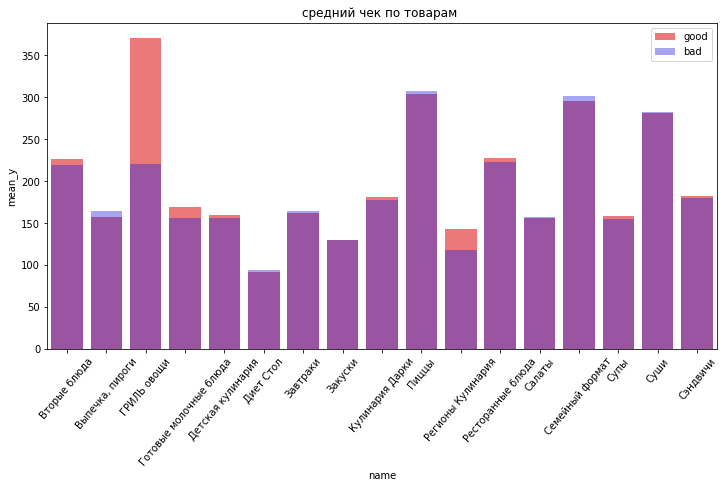

In [ ]:
fig = plt.figure(figsize=(12,6))
g = sns.barplot(data=compare, x='name', y='mean_x', color='red', label='good', alpha = 0.6)
g = sns.barplot(data=compare, x='name', y='mean_y', color='blue', label='bad', alpha = 0.4)
plt.title("средний чек по товарам ", size=12)
plt.xlabel('name')
plt.legend()

plt.xticks( rotation=50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

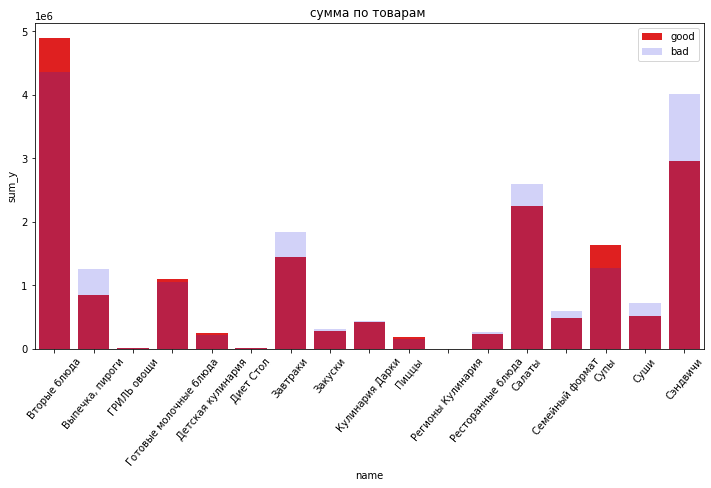

In [ ]:
fig = plt.figure(figsize=(12,6))
g = sns.barplot(data=compare, x='name', y='sum_x', color='red', label='good')
g = sns.barplot(data=compare, x='name', y='sum_y', color='blue', label='bad', alpha = 0.2)
plt.title("сумма по товарам ", size=12)
plt.xlabel('name')
plt.legend()

plt.xticks( rotation=50)

посмотрим по дням недели

In [ ]:
good_sum_day = data_good.groupby(['name_gr2','checkuid', 'day'])['basesum'].sum().reset_index()
good_sum_day 

,name_gr2,checkuid,day,basesum
0,Вторые блюда,0005E332-0193-EC11-9064-005056A7A8DF,0,192.73
1,Вторые блюда,000711A0-07A5-EC11-9064-005056A7A8DF,2,132.73
2,Вторые блюда,000B58C8-61C5-EC11-9064-005056A7A8DF,1,191.67
3,Вторые блюда,00109A8F-0FA6-EC11-9064-005056A7A8DF,3,136.67
4,Вторые блюда,0013FF84-27BE-EC11-9064-005056A7A8DF,6,216.36
...,...,...,...,...
94580,Сэндвичи,FFF321BE-93CB-EC11-9064-005056A7A8DF,2,154.55
94581,Сэндвичи,FFF7810C-66B2-EC11-9064-005056A7A8DF,5,161.82
94582,Сэндвичи,FFF933AC-DF92-EC11-9064-005056A7A8DF,0,89.09
94583,Сэндвичи,FFFCAD9E-F18B-EC11-9064-005056A7A8DF,5,180.00


In [ ]:
good_table_day = good_sum_day.groupby(['name_gr2', 'day']).agg({'basesum':['sum', 'count', 'mean']}).reset_index()
good_table_day.columns = ['name', 'day', 'sum', 'check_nunique', 'mean']
good_table_day.sort_values(by = 'sum', ascending = False)

,name,day,sum,check_nunique,mean
3,Вторые блюда,3,867003.58,3889,222.94
2,Вторые блюда,2,837217.44,3771,222.01
1,Вторые блюда,1,803258.82,3519,228.26
0,Вторые блюда,0,786352.60,3435,228.92
4,Вторые блюда,4,700812.59,3218,217.78
...,...,...,...,...,...
39,Диет Стол,6,999.05,10,99.91
38,Диет Стол,5,979.36,12,81.61
69,Регионы Кулинария,2,230.00,2,115.00
68,Регионы Кулинария,0,200.00,1,200.00


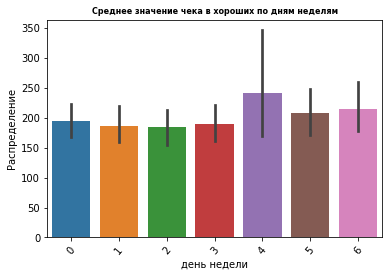

In [ ]:
sns.barplot(data=good_table_day, x='day', y = 'mean', label = 'name')
plt.title('Среднее значение чека в хороших по дням неделям', fontdict={'fontsize': 8, 'fontweight': 'bold'})
plt.xlabel('день недели')
plt.ylabel('Распределение')
plt.xticks( rotation=50)
plt.show()

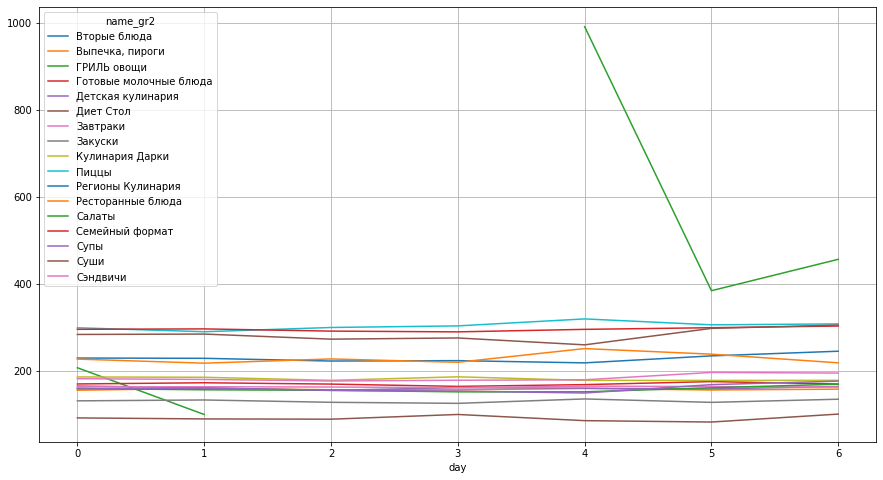

In [ ]:
tov_good = good_sum_day .pivot_table(index = 'day', columns = 'name_gr2', values = 'basesum', aggfunc = 'mean' ).plot(figsize=(15, 8), grid=True)

plt.show()

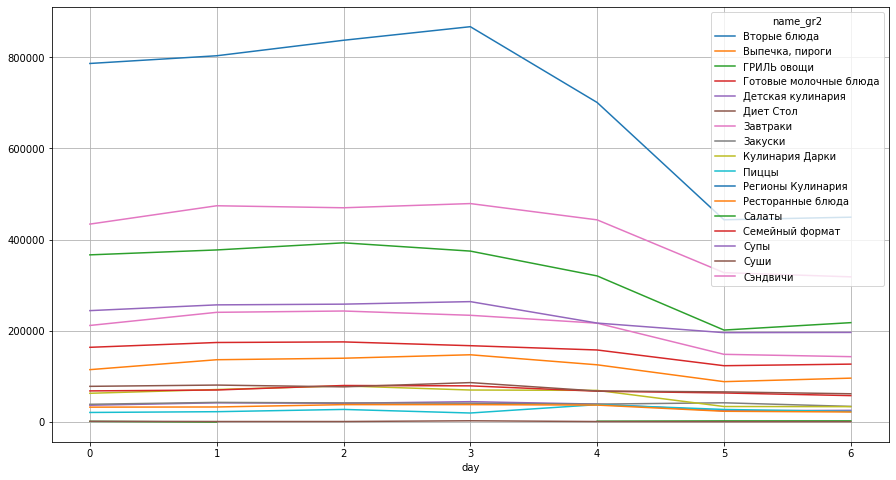

In [ ]:
tov_good_sum = good_sum_day .pivot_table(index = 'day', columns = 'name_gr2', values = 'basesum', aggfunc = 'sum' ).plot(figsize=(15, 8), grid=True)

plt.show()

посмотрим плохие теперь по дням неделям

In [ ]:
bad_sum_day = data_bad.groupby(['name_gr2','checkuid', 'day'])['basesum'].sum().reset_index()
bad_sum_day 

,name_gr2,checkuid,day,basesum
0,Вторые блюда,00053CF0-93C4-EC11-9064-005056A7A8DF,0,213.33
1,Вторые блюда,00058509-A59E-EC11-9064-005056A7A8DF,1,140.00
2,Вторые блюда,00081915-8085-EC11-9064-005056A7A8DF,4,133.50
3,Вторые блюда,000AF206-9CC0-EC11-9064-005056A7A8DF,2,240.00
4,Вторые блюда,000C8ED2-46AB-EC11-9064-005056A7A8DF,3,207.27
...,...,...,...,...
105220,Сэндвичи,FFF32233-FFAF-EC11-9064-005056A7A8DF,2,129.17
105221,Сэндвичи,FFF6C00F-C888-EC11-9064-005056A7A8DF,1,152.73
105222,Сэндвичи,FFF7EDFC-E6B4-EC11-9064-005056A7A8DF,1,323.64
105223,Сэндвичи,FFF94587-E8BA-EC11-9064-005056A7A8DF,2,195.18


In [ ]:
bad_table_day = bad_sum_day.groupby(['name_gr2', 'day']).agg({'basesum':['sum', 'count', 'mean']}).reset_index()
bad_table_day.columns = ['name', 'day', 'sum', 'check_nunique', 'mean']
bad_table_day.sort_values(by = 'sum', ascending = False)

,name,day,sum,check_nunique,mean
2,Вторые блюда,2,793805.32,3639,218.14
3,Вторые блюда,3,789206.40,3671,214.98
1,Вторые блюда,1,726719.17,3266,222.51
106,Сэндвичи,3,685860.85,3851,178.10
0,Вторые блюда,0,664536.07,3025,219.68
...,...,...,...,...,...
14,ГРИЛЬ овощи,0,1614.92,8,201.86
38,Диет Стол,6,1366.32,18,75.91
37,Диет Стол,5,1034.90,11,94.08
67,Регионы Кулинария,0,351.89,3,117.30


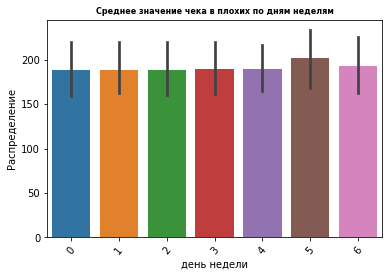

In [ ]:
sns.barplot(data=bad_table_day, x='day', y = 'mean', label = 'name')
plt.title('Среднее значение чека в плохих по дням неделям', fontdict={'fontsize': 8, 'fontweight': 'bold'})
plt.xlabel('день недели')
plt.ylabel('Распределение')
plt.xticks( rotation=50)
plt.show()

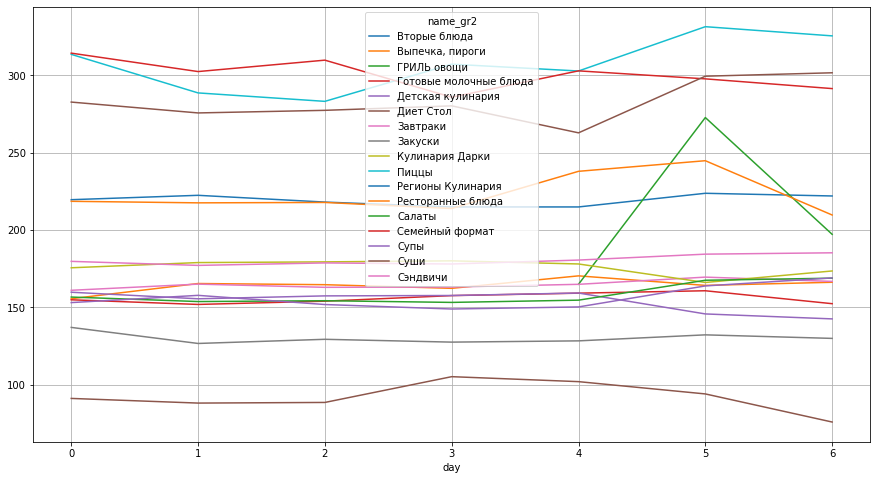

In [ ]:
tov_bad = bad_sum_day .pivot_table(index = 'day', columns = 'name_gr2', values = 'basesum', aggfunc = 'mean' ).plot(figsize=(15, 8), grid=True)

plt.show()

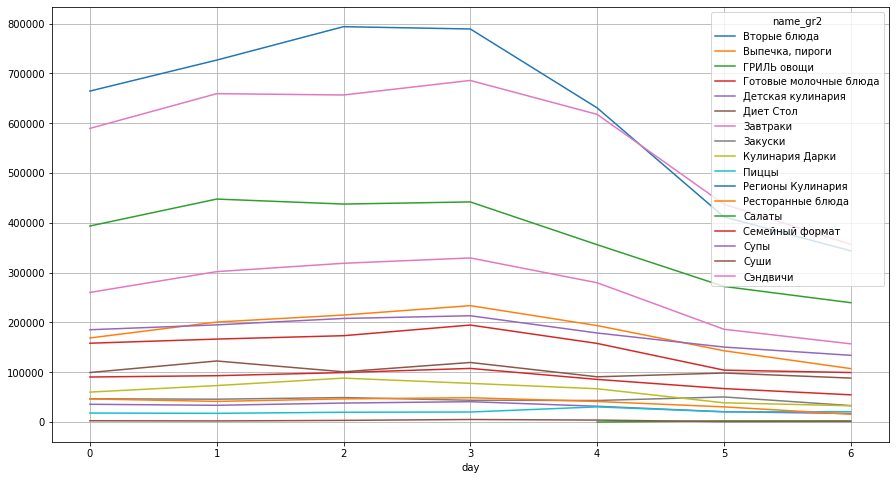

In [ ]:
tov_bad = bad_sum_day .pivot_table(index = 'day', columns = 'name_gr2', values = 'basesum', aggfunc = 'sum' ).plot(figsize=(15, 8), grid=True)

plt.show()

Вторые блюда покупают меньше в пн/вт/ср в плохих (по сумме)
среднеий чек выше в хороших в пятницу (за счет гриля?)

> гриль овощи можно вообще удалить, они в плохих не продаются в пятницу, в хороших берут, но значение слишком выбивается


>вторые блюда и супы получаются самые отличающиеся


вторые блюда супы сэндвичи салаты (выбрали по объемам)

In [ ]:
compare['name'].unique()

array(['Вторые блюда', 'Выпечка, пироги', 'ГРИЛЬ овощи',
       'Готовые молочные блюда', 'Детская кулинария', 'Диет Стол',
       'Завтраки', 'Закуски', 'Кулинария Дарки', 'Пиццы',
       'Регионы Кулинария', 'Ресторанные блюда', 'Салаты',
       'Семейный формат', 'Супы', 'Суши', 'Сэндвичи'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929781 entries, 12 to 17034523
Data columns (total 18 columns):
 #   Column        Dtype         
---  ------        -----         
 0   checkuid      object        
 1   id_tt_cl      object        
 2   id_tov_cl     int64         
 3   price_retail  float64       
 4   quantity      float64       
 5   baseprice     float64       
 6   basesum       float64       
 7   date_ch       datetime64[ns]
 8   time_ch       object        
 9   order_type    object        
 10  low_sale      int64         
 11  month         int64         
 12  name_tov      object        
 13  id_group      float64       
 14  name_gr       object        
 15  id_group2     float64       
 16  name_gr2      object        
 17  day           int64         
dtypes: datetime64[ns](1), float64(6), int64(4), object(7)
memory usage: 279.7+ MB


In [ ]:
data2 = data.query('name_gr2 =="Вторые блюда" or name_gr2 =="Супы" or name_gr2 =="Сэндвичи" or name_gr2 =="Салаты"')

вторые блюда
супы
сэндвичи
салаты



In [ ]:
data2.head(3)

,checkuid,id_tt_cl,id_tov_cl,price_retail,quantity,baseprice,basesum,date_ch,time_ch,order_type,low_sale,month,name_tov,id_group,name_gr,id_group2,name_gr2,day
12,468A5276-6591-EC11-9064-005056A7A8DF,10864,20866,115.00,3.00,115.00,345.00,2022-02-19,12:15:50.0000000,offline,0,2,Онигири с тунцом в майонезе,10133.00,Кулинария,10195.00,Сэндвичи,5
13,8EADB96C-4F91-EC11-9064-005056A7A8DF,10864,20866,115.00,1.00,115.00,115.00,2022-02-19,09:43:06.0000000,offline,0,2,Онигири с тунцом в майонезе,10133.00,Кулинария,10195.00,Сэндвичи,5
22,0BB4D3CD-8691-EC11-9064-005056A7A8DF,10864,20969,165.00,1.00,165.00,165.00,2022-02-19,16:05:53.0000000,offline,0,2,Котлета куриная с картофельным пюре,10133.00,Кулинария,10223.00,Вторые блюда,5


In [ ]:
data2['name_gr2'].unique()

array(['Сэндвичи', 'Вторые блюда', 'Салаты', 'Супы'], dtype=object)

In [ ]:
data2_good = data2.loc[data2['id_tt_cl'].isin(good)]

In [ ]:
good2_sum = data2_good.groupby(['name_tov','checkuid'])['basesum'].sum().reset_index()
good2_sum

,name_tov,checkuid,basesum
0,"""Не пельмени"" с постным соусом",2CBD1F09-B1B5-EC11-9064-005056A7A8DF,223.33
1,"""Не пельмени"" с постным соусом",2DAF4562-76B6-EC11-9064-005056A7A8DF,223.33
2,"""Не пельмени"" с постным соусом",3CA12313-DAB4-EC11-9064-005056A7A8DF,223.33
3,"""Не пельмени"" с постным соусом",4F2296B3-4EB0-EC11-9064-005056A7A8DF,223.33
4,"""Не пельмени"" с постным соусом",64DFD382-41B0-EC11-9064-005056A7A8DF,134.00
...,...,...,...
73634,Щи из свежей капусты с курицей,F86BE102-D39A-EC11-9064-005056A7A8DF,155.00
73635,Щи из свежей капусты с курицей,FD3F424E-AE8C-EC11-9064-005056A7A8DF,155.00
73636,Щи из свежей капусты с курицей,FE261DDB-B7AA-EC11-9064-005056A7A8DF,165.00
73637,Щи из свежей капусты с курицей,FED4EE08-59BA-EC11-9064-005056A7A8DF,148.50


In [ ]:
good2_table = good2_sum.groupby('name_tov').agg({'basesum':['sum', 'count', 'mean']}).reset_index()
good2_table.columns = ['name', 'sum', 'check_nunique', 'mean']
good2_table.sort_values(by = 'sum', ascending = False).head(20)

,name,sum,check_nunique,mean
203,"Сэндвич ""Нежный"" с курицей, омлетом и моцареллой",255870.66,1457,175.61
208,"Сэндвич ролл ""Цезарь""",241790.24,1484,162.93
16,"Борщ ""Украинский""",186402.55,1524,122.31
244,"Чиабатта с курицей, 205 г",183410.25,1056,173.68
210,Сэндвич ролл с бужениной запеченной,175745.26,1171,150.08
218,"Сэндвич ролл с курицей и соусом ""Дор-Блю""",169000.22,1047,161.41
81,Куриное филе запеченное с овощами,165739.15,679,244.09
126,Плов с курицей,160271.17,1094,146.50
83,Куриный кармашек с картофелем и розмарином,132871.03,611,217.46
69,Котлета куриная с картофельным пюре,126167.53,731,172.60


In [ ]:
good2_table['mean'].mean()

167.18090471737798

In [ ]:
good2_table['mean'].median()

166.5848096188103

In [ ]:
good2_table['sum'].median()

40420.716666606

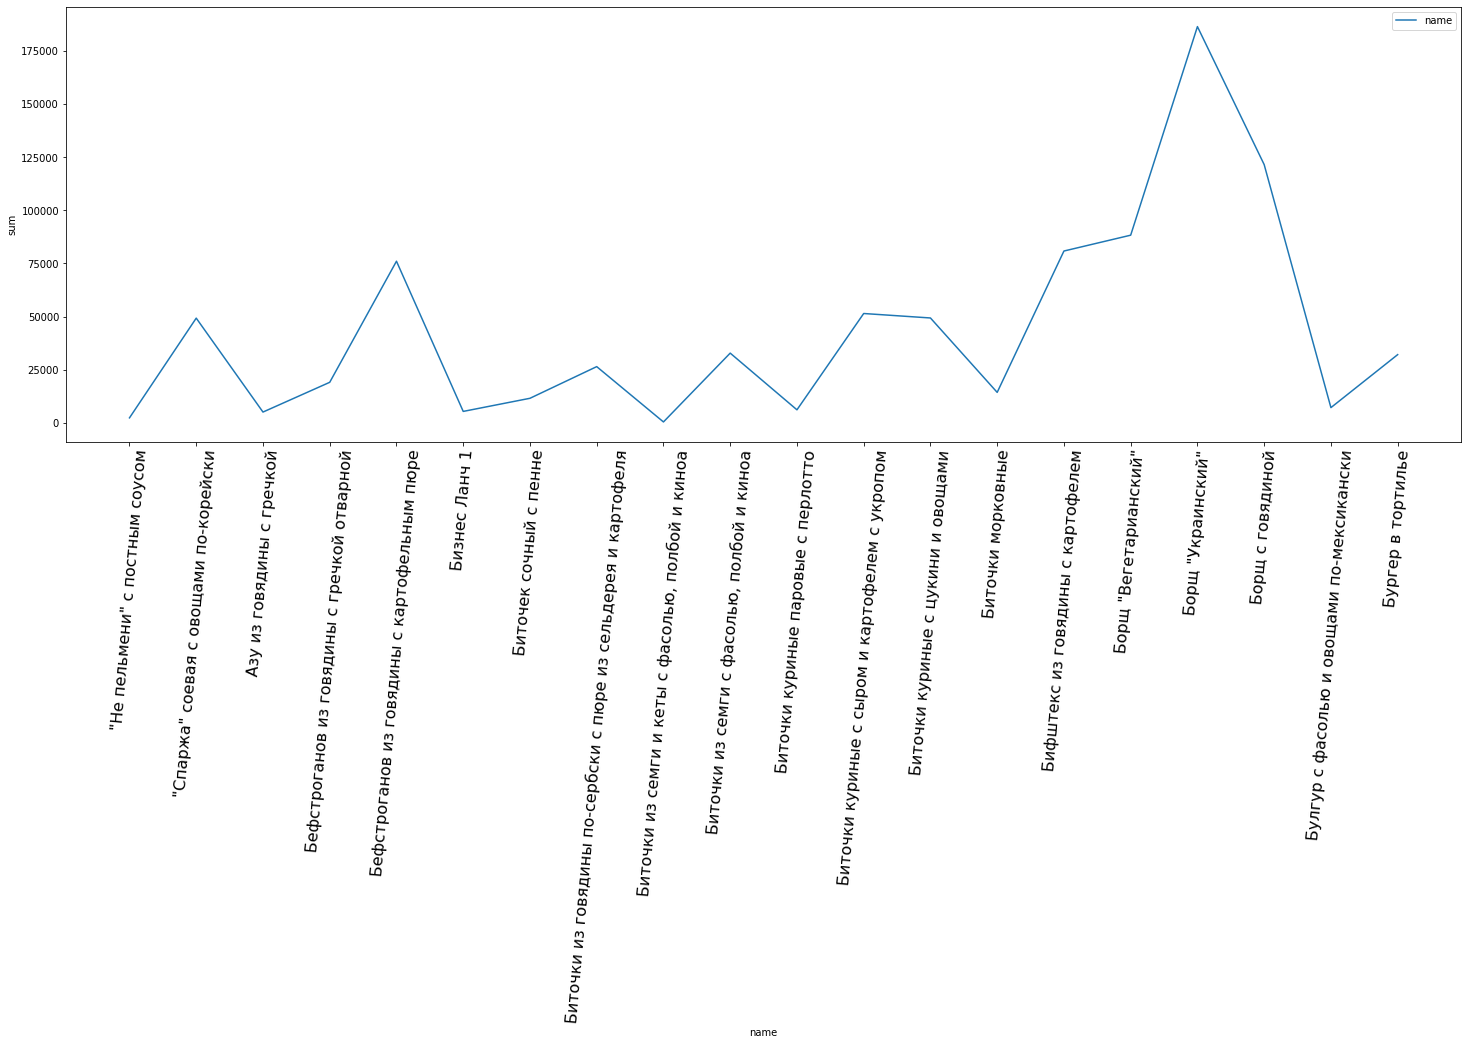

In [ ]:
plt.figure(figsize=(25, 8))
sns.lineplot(data=good2_table.head(20), x='name', y = 'sum', label = 'name')
plt.xticks( rotation=85, fontsize = 16)
plt.show()

In [ ]:
data2_bad = data2.loc[data2['id_tt_cl'].isin(bad)]

In [ ]:
bad2_sum = data2_bad.groupby(['name_tov','checkuid'])['basesum'].sum().reset_index()
bad2_sum

,name_tov,checkuid,basesum
0,"""Не пельмени"" с постным соусом",09C3A71E-3BB0-EC11-9064-005056A7A8DF,134.00
1,"""Не пельмени"" с постным соусом",1BD827C8-29B0-EC11-9064-005056A7A8DF,223.33
2,"""Не пельмени"" с постным соусом",3104D995-3BB0-EC11-9064-005056A7A8DF,223.33
3,"""Не пельмени"" с постным соусом",39108767-CB72-490C-A19A-385174889B41,223.33
4,"""Не пельмени"" с постным соусом",53B7820A-A2AE-EC11-9064-005056A7A8DF,223.33
...,...,...,...
77571,Щи из свежей капусты с курицей,F0A2A1A4-3FB6-EC11-9064-005056A7A8DF,165.00
77572,Щи из свежей капусты с курицей,F39D2411-57B3-EC11-9064-005056A7A8DF,165.00
77573,Щи из свежей капусты с курицей,FC4E0F46-CBAD-EC11-9064-005056A7A8DF,165.00
77574,Щи из свежей капусты с курицей,FD13B7F1-8AA4-EC11-9064-005056A7A8DF,155.00


In [ ]:
bad2_table = bad2_sum.groupby('name_tov').agg({'basesum':['sum', 'count', 'mean']}).reset_index()
bad2_table.columns = ['name', 'sum', 'check_nunique', 'mean']
bad2_table.sort_values(by = 'sum', ascending = False)

,name,sum,check_nunique,mean
204,"Сэндвич ролл ""Цезарь""",351724.80,2100,167.49
199,"Сэндвич ""Нежный"" с курицей, омлетом и моцареллой",314125.71,1815,173.07
206,Сэндвич ролл с бужениной запеченной,249606.81,1682,148.40
240,"Чиабатта с курицей, 205 г",222749.29,1299,171.48
217,Сэндвич ролл с лососем (кетой),178541.20,1047,170.53
...,...,...,...,...
33,Голубцы ленивые из мяса птицы,1863.49,14,133.11
184,Суп гречневый с грибами,1749.22,19,92.06
210,Сэндвич ролл с индейкой су-вид,1511.97,10,151.20
95,Макароны по-флотски с тушеной говядиной,1425.92,9,158.44


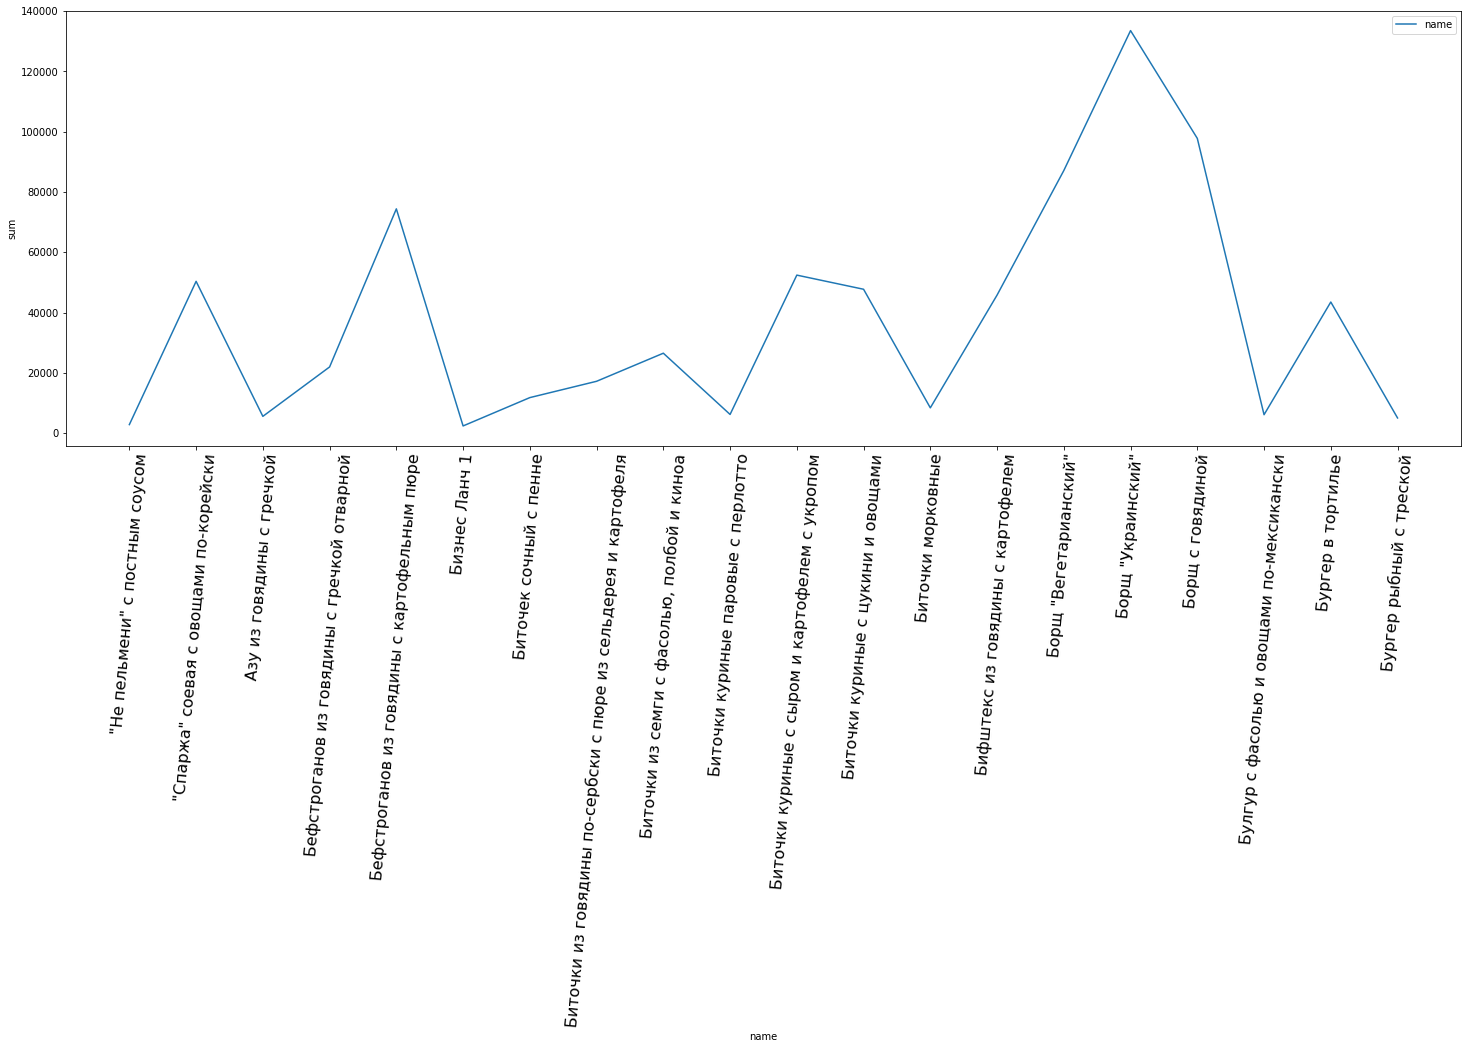

In [ ]:
plt.figure(figsize=(25, 8))
sns.lineplot(data=bad2_table.head(20), x='name', y = 'sum', label = 'name')
plt.xticks( rotation=85, fontsize = 16)
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 <a list of 41 Text major ticklabel objects>)

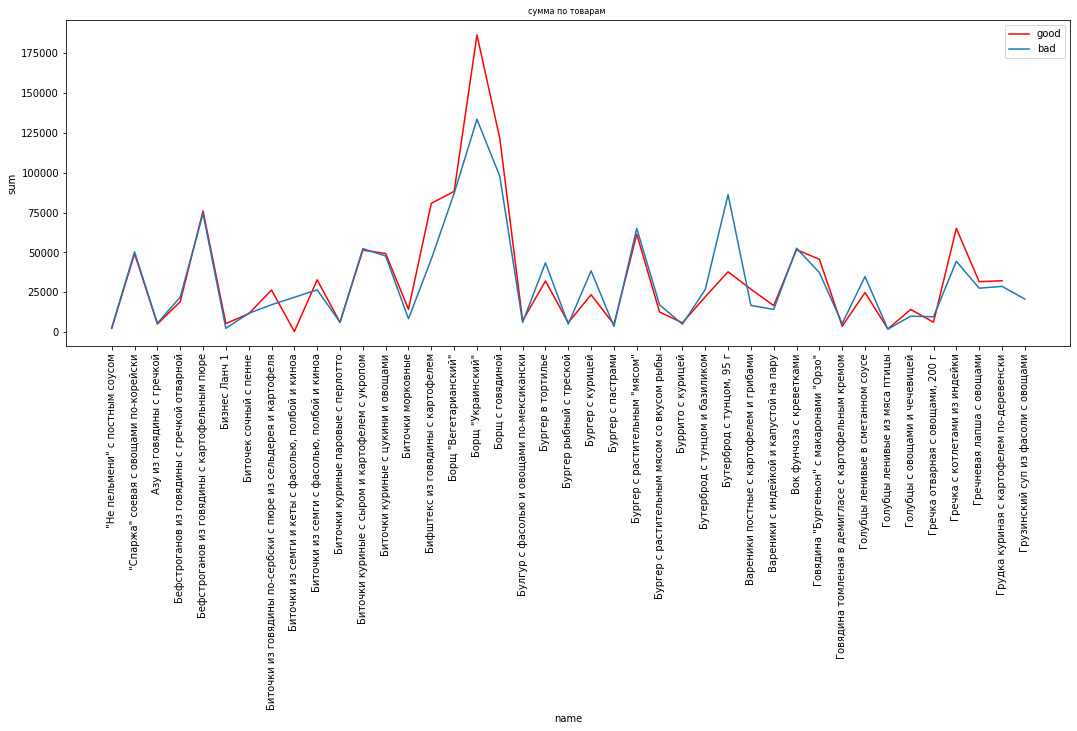

In [ ]:
fig = plt.figure(figsize=(18,6))
a = sns.lineplot(data=good2_table.head(40), x='name', y = 'sum', label = 'good', color='red')
a = sns.lineplot(data=bad2_table.head(40), x='name', y = 'sum', label = 'bad')
plt.title("сумма по товарам ", size=8)
plt.xlabel('name')
plt.legend()

plt.xticks( rotation=90)

проверим по среднему чеку

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 <a list of 51 Text major ticklabel objects>)

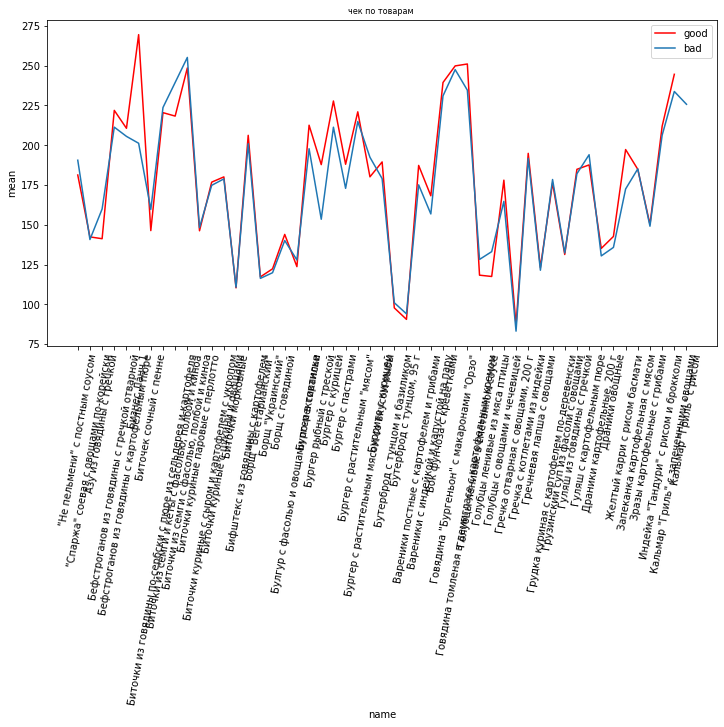

In [ ]:
fig = plt.figure(figsize=(12,6))
a = sns.lineplot(data=good2_table.head(50), x='name', y = 'mean', label = 'good', color='red')
a = sns.lineplot(data=bad2_table.head(50), x='name', y = 'mean', label = 'bad')
plt.title("чек по товарам ", size=8)
plt.xlabel('name')
plt.legend()

plt.xticks( rotation=80)

In [ ]:
compare2 = good2_table.merge(bad2_table, on = 'name', how = 'left')

In [ ]:
compare2['rate'] = compare2['sum_x']/compare2['sum_y']

In [ ]:
compare2.sort_values(by = 'rate', ascending = False)

,name,sum_x,check_nunique_x,mean_x,sum_y,check_nunique_y,mean_y,rate
83,Куриный кармашек с картофелем и розмарином,132871.03,611,217.46,40257.17,193.00,208.59,3.30
191,Суп с фрикадельками из индейки,70164.00,553,126.88,27851.35,228.00,122.16,2.52
189,Суп из шпината с филе лосося,24350.13,189,128.84,9899.51,80.00,123.74,2.46
97,Макароны по-флотски с растительным мясом,33870.67,244,138.81,14001.96,103.00,135.94,2.42
156,Салат азиатский с ростбифом и кунжутной заправкой,5272.65,26,202.79,2345.00,11.00,213.18,2.25
...,...,...,...,...,...,...,...,...
224,Сэндвич с ветчиной и сыром,3827.71,24,159.49,9439.98,64.00,147.50,0.41
8,"Биточки из семги и кеты с фасолью, полбой и киноа",436.58,2,218.29,NaN,NaN,NaN,NaN
68,Котлета куриная с карт. пюре,330.00,2,165.00,NaN,NaN,NaN,NaN
71,Котлеты Домашние из говядины с овощами гриль,421.45,2,210.73,NaN,NaN,NaN,NaN


In [ ]:
compare2[compare2['rate'].isna()]

,name,sum_x,check_nunique_x,mean_x,sum_y,check_nunique_y,mean_y,rate
8,"Биточки из семги и кеты с фасолью, полбой и киноа",436.58,2,218.29,NaN,NaN,NaN,NaN
68,Котлета куриная с карт. пюре,330.00,2,165.00,NaN,NaN,NaN,NaN
71,Котлеты Домашние из говядины с овощами гриль,421.45,2,210.73,NaN,NaN,NaN,NaN
158,Салат винегрет с маринованной капустой,195.95,4,48.99,NaN,NaN,NaN,NaN


In [ ]:
compare2['sum_x'].median()

40420.716666606

In [ ]:
compare2['rate'].median()

1.0033774838664344

In [ ]:
compare['check_nunique_x'].median()

2175.0

In [ ]:
compare21 = compare2.query('rate >=1 and check_nunique_x > 500')

In [ ]:
compare21.sort_values(by = 'rate', ascending = False).head(10)

,name,sum_x,check_nunique_x,mean_x,sum_y,check_nunique_y,mean_y,rate
83,Куриный кармашек с картофелем и розмарином,132871.03,611,217.46,40257.17,193.00,208.59,3.30
191,Суп с фрикадельками из индейки,70164.00,553,126.88,27851.35,228.00,122.16,2.52
183,"Суп ""Гороховый"" с копчёностями",94802.72,651,145.63,50702.09,372.00,136.30,1.87
231,Тепаньяки с курицей,83956.19,585,143.51,54765.57,394.00,139.00,1.53
126,Плов с курицей,160271.17,1094,146.50,107465.02,739.00,145.42,1.49
185,"Суп ""Рассольник"" с курицей",77799.95,575,135.30,54111.67,425.00,127.32,1.44
16,"Борщ ""Украинский""",186402.55,1524,122.31,133530.11,1114.00,119.87,1.40
194,Суп-крем куриный,119822.47,868,138.04,86772.20,652.00,133.09,1.38
63,Котлета Пожарская с картофельным пюре,103625.38,517,200.44,76420.05,387.00,197.47,1.36
81,Куриное филе запеченное с овощами,165739.15,679,244.09,125205.58,529.00,236.68,1.32


In [ ]:
compare21.sort_values(by = 'sum_x', ascending = False)

,name,sum_x,check_nunique_x,mean_x,sum_y,check_nunique_y,mean_y,rate
16,"Борщ ""Украинский""",186402.55,1524,122.31,133530.11,1114.00,119.87,1.40
218,"Сэндвич ролл с курицей и соусом ""Дор-Блю""",169000.22,1047,161.41,168578.99,1066.00,158.14,1.00
81,Куриное филе запеченное с овощами,165739.15,679,244.09,125205.58,529.00,236.68,1.32
126,Плов с курицей,160271.17,1094,146.50,107465.02,739.00,145.42,1.49
83,Куриный кармашек с картофелем и розмарином,132871.03,611,217.46,40257.17,193.00,208.59,3.30
17,Борщ с говядиной,121485.23,844,143.94,97782.27,698.00,140.09,1.24
194,Суп-крем куриный,119822.47,868,138.04,86772.20,652.00,133.09,1.38
142,"Салат ""Мимоза"", 180 г",108368.52,819,132.32,97088.89,748.00,129.80,1.12
63,Котлета Пожарская с картофельным пюре,103625.38,517,200.44,76420.05,387.00,197.47,1.36
201,Суп-пюре с грибами,95080.96,714,133.17,80985.77,614.00,131.90,1.17


чтобы посмотреть такой же график по среднему чеку, сделаю копию таблицы сравнения и ограницу разницу в rate

In [ ]:
compare2['rate_mean'] = compare2['mean_x']/compare2['mean_y']

In [ ]:
compare22 = compare2.query('rate_mean >=1 and check_nunique_x > 500')
compare22.sort_values(by = 'rate_mean', ascending = False)

,name,sum_x,check_nunique_x,mean_x,sum_y,check_nunique_y,mean_y,rate,rate_mean
183,"Суп ""Гороховый"" с копчёностями",94802.72,651,145.63,50702.09,372.00,136.30,1.87,1.07
185,"Суп ""Рассольник"" с курицей",77799.95,575,135.30,54111.67,425.00,127.32,1.44,1.06
83,Куриный кармашек с картофелем и розмарином,132871.03,611,217.46,40257.17,193.00,208.59,3.30,1.04
191,Суп с фрикадельками из индейки,70164.00,553,126.88,27851.35,228.00,122.16,2.52,1.04
194,Суп-крем куриный,119822.47,868,138.04,86772.20,652.00,133.09,1.38,1.04
231,Тепаньяки с курицей,83956.19,585,143.51,54765.57,394.00,139.00,1.53,1.03
81,Куриное филе запеченное с овощами,165739.15,679,244.09,125205.58,529.00,236.68,1.32,1.03
121,Пенне с грибами и овощами,56138.07,536,104.74,56936.68,559.00,101.85,0.99,1.03
17,Борщ с говядиной,121485.23,844,143.94,97782.27,698.00,140.09,1.24,1.03
230,Тальятелле с курицей в сырном соусе,77837.49,502,155.05,75337.07,499.00,150.98,1.03,1.03


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

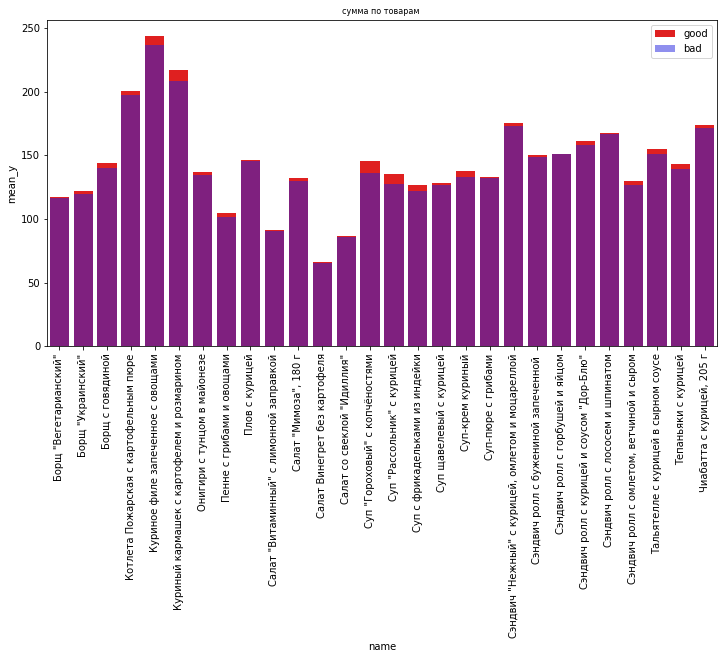

In [ ]:
fig = plt.figure(figsize=(12,6))
g = sns.barplot(data=compare22, x='name', y='mean_x', color='red', label='good')
g = sns.barplot(data=compare22, x='name', y='mean_y', color='blue', label='bad', alpha = 0.5)
plt.title("сумма по товарам ", size=8)
plt.xlabel('name')
plt.legend()

plt.xticks( rotation=90)

### отдельно посмотрим каждую из 4-х групп на товыры

In [ ]:
data_second = data.query('name_gr2 =="Вторые блюда"')

In [ ]:
data_second.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407126 entries, 22 to 17033935
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   checkuid      407126 non-null  object        
 1   id_tt_cl      407126 non-null  object        
 2   id_tov_cl     407126 non-null  int64         
 3   price_retail  407126 non-null  float64       
 4   quantity      407126 non-null  float64       
 5   baseprice     407126 non-null  float64       
 6   basesum       407126 non-null  float64       
 7   date_ch       407126 non-null  datetime64[ns]
 8   time_ch       407126 non-null  object        
 9   order_type    407126 non-null  object        
 10  low_sale      407126 non-null  int64         
 11  month         407126 non-null  int64         
 12  name_tov      407126 non-null  object        
 13  id_group      407126 non-null  float64       
 14  name_gr       407126 non-null  object        
 15  id_group2     

In [ ]:
data_second_good = data_second.loc[data_second['id_tt_cl'].isin(good)]


In [ ]:
data_second_good_sum = data_second_good.groupby(['name_tov','checkuid'])['basesum'].sum().reset_index()


In [ ]:
data_second_good_table = data_second_good_sum.groupby('name_tov').agg({'basesum':['sum', 'count', 'mean']}).reset_index()
data_second_good_table.columns = ['name', 'sum', 'check_nunique', 'mean']
data_second_good_table.sort_values(by = 'sum', ascending = False).head(30)

,name,sum,check_nunique,mean
64,Куриное филе запеченное с овощами,165739.15,679,244.09
103,Плов с курицей,160271.17,1094,146.50
66,Куриный кармашек с картофелем и розмарином,132871.03,611,217.46
54,Котлета куриная с картофельным пюре,126167.53,731,172.60
125,Шницель куриный в сырной панировке с макаронами,108479.16,498,217.83
48,Котлета Пожарская с картофельным пюре,103625.38,517,200.44
62,Куриная грудка с грибами и пенне,99007.33,493,200.83
108,"Стрипсы куриные, 250 г",98023.07,415,236.20
110,Тепаньяки с курицей,83956.19,585,143.51
101,"Плов ""Узбекский"" с бараниной и говядиной",83225.45,430,193.55


In [ ]:
data_second_good_table2 = data_second_good_table.sort_values(by = 'sum', ascending = False).head(30)

In [ ]:
data_second_bad = data_second.loc[data_second['id_tt_cl'].isin(bad)]

In [ ]:
data_second_bad_sum = data_second_bad .groupby(['name_tov','checkuid'])['basesum'].sum().reset_index()

In [ ]:
data_second_bad_table = data_second_bad_sum.groupby('name_tov').agg({'basesum':['sum', 'count', 'mean']}).reset_index()
data_second_bad_table.columns = ['name', 'sum', 'check_nunique', 'mean']
data_second_bad_table.sort_values(by = 'sum', ascending = False).head(30)

,name,sum,check_nunique,mean
52,Котлета куриная с картофельным пюре,171455.82,969,176.94
61,Куриное филе запеченное с овощами,125205.58,529,236.68
100,Плов с курицей,107465.02,739,145.42
122,Шницель куриный в сырной панировке с макаронами,104570.01,495,211.25
105,"Стрипсы куриные, 250 г",91121.30,391,233.05
57,"Котлеты куриные с моцареллой с булгуром, киноа...",76977.83,378,203.65
47,Котлета Пожарская с картофельным пюре,76420.05,387,197.47
98,"Плов ""Узбекский"" с бараниной и говядиной",76358.81,401,190.42
106,Тальятелле с курицей в сырном соусе,75337.07,499,150.98
3,Бефстроганов из говядины с картофельным пюре,74409.33,362,205.55


In [ ]:
data_second_bad_table2 = data_second_bad_table.sort_values(by = 'sum', ascending = False).head(30)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 <a list of 37 Text major ticklabel objects>)

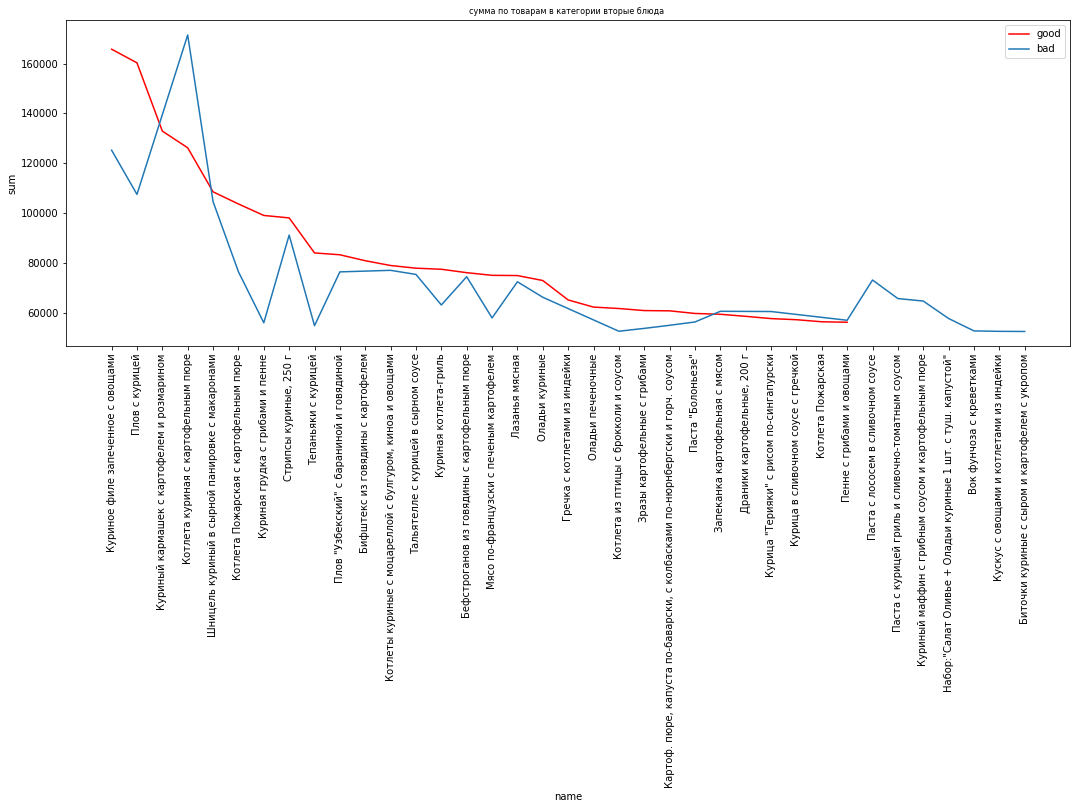

In [ ]:
fig = plt.figure(figsize=(18,6))
a = sns.lineplot(data=data_second_good_table2, x='name', y = 'sum', label = 'good', color='red')
a = sns.lineplot(data=data_second_bad_table2, x='name', y = 'sum', label = 'bad')
plt.title("сумма по товарам в категории вторые блюда ", size=8)
plt.xlabel('name')
plt.legend()

plt.xticks( rotation=90)

In [ ]:
test = data_second_good_table2.merge(data_second_bad_table2, on = 'name', how = 'left')
test['rate'] = test['sum_x']/test['sum_y']
test.sort_values(by = 'rate', ascending = False)

,name,sum_x,check_nunique_x,mean_x,sum_y,check_nunique_y,mean_y,rate
6,Куриная грудка с грибами и пенне,99007.33,493,200.83,55930.78,271.00,206.39,1.77
8,Тепаньяки с курицей,83956.19,585,143.51,54765.57,394.00,139.00,1.53
1,Плов с курицей,160271.17,1094,146.50,107465.02,739.00,145.42,1.49
5,Котлета Пожарская с картофельным пюре,103625.38,517,200.44,76420.05,387.00,197.47,1.36
0,Куриное филе запеченное с овощами,165739.15,679,244.09,125205.58,529.00,236.68,1.32
15,Мясо по-французски с печеным картофелем,74971.27,369,203.17,57868.76,290.00,199.55,1.30
13,Куриная котлета-гриль,77406.18,373,207.52,63066.47,314.00,200.85,1.23
20,Котлета из птицы с брокколи и соусом,61653.18,436,141.41,52529.51,364.00,144.31,1.17
21,Зразы картофельные с грибами,60824.08,405,150.18,53672.76,360.00,149.09,1.13
22,"Картоф. пюре, капуста по-баварски, с колбаскам...",60717.97,254,239.05,54919.27,227.00,241.94,1.11


Продукты:
Куриное филе запеченное с овощами, Котлета Пожарская с картофельным пюре	, Плов с курицей, Куриная грудка с грибами и пенне, Тепаньяки с курицей



In [ ]:
def category(categores):
    for category in categores:
        good = '12612', '13185', '14859' 
        bad='11616', '11178', '11421'
        
        category_tov_id = list(data.query('name_gr2 == @category')['id_tov_cl'].unique())
        
        bad = data[
                (data['id_tov_cl'].isin(category_tov_id)) &
                (data['id_tt_cl'].isin((bad)))].groupby(['name_tov','checkuid'])['basesum'].sum().reset_index()
        
        good = data[
                (data['id_tov_cl'].isin(category_tov_id)) &
                (data['id_tt_cl'].isin((good)))].groupby(['name_tov','checkuid'])['basesum'].sum().reset_index()
        good_soup_table = good.groupby('name_tov').agg({'basesum':['sum', 'count', 'mean']}).reset_index()
        good_soup_table.columns = ['name', 'sum', 'check_nunique', 'mean']
        good_soup_table.sort_values(by = 'sum', ascending = False).head(30)
        good_soup_table2 = good_soup_table.sort_values(by = 'sum', ascending = False).head(30)

        bad_soup_table = bad.groupby('name_tov').agg({'basesum':['sum', 'count', 'mean']}).reset_index()
        bad_soup_table.columns = ['name', 'sum', 'check_nunique', 'mean']
        bad_soup_table.sort_values(by = 'sum', ascending = False).head(30)
        bad_soup_table2 = bad_soup_table.sort_values(by = 'sum', ascending = False).head(30)  

        fig = plt.figure(figsize=(18,6))
        a = sns.lineplot(data=good_soup_table2, x='name', y = 'sum', label = 'good', color='red')
        a = sns.lineplot(data=bad_soup_table2, x='name', y = 'sum', label = 'bad')
        plt.title(f'сумма по товарам в категории "{category}"')
        plt.xlabel('name')
        plt.legend()
        plt.xticks( rotation=90)
        plt.show()

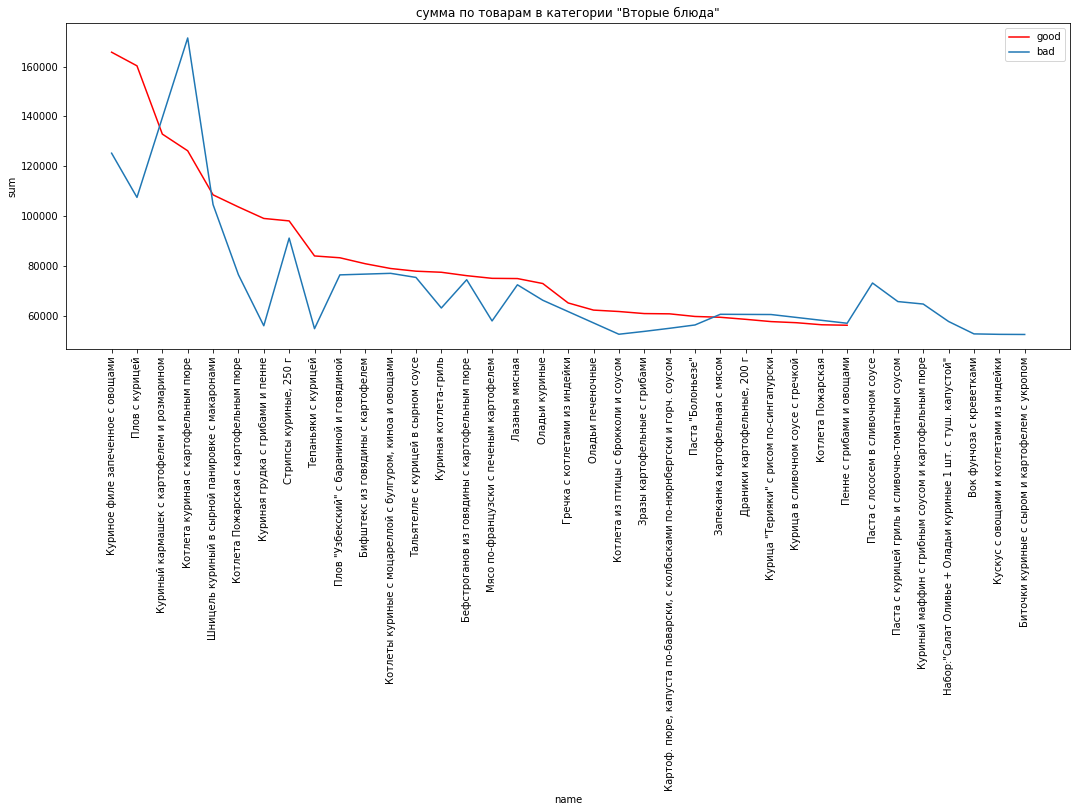

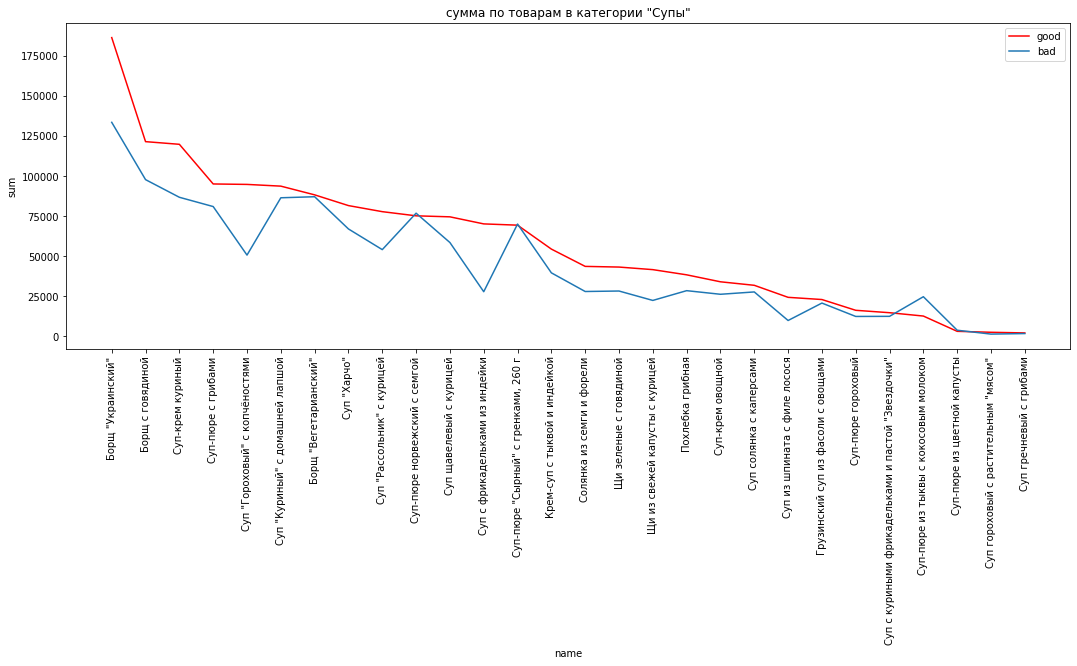

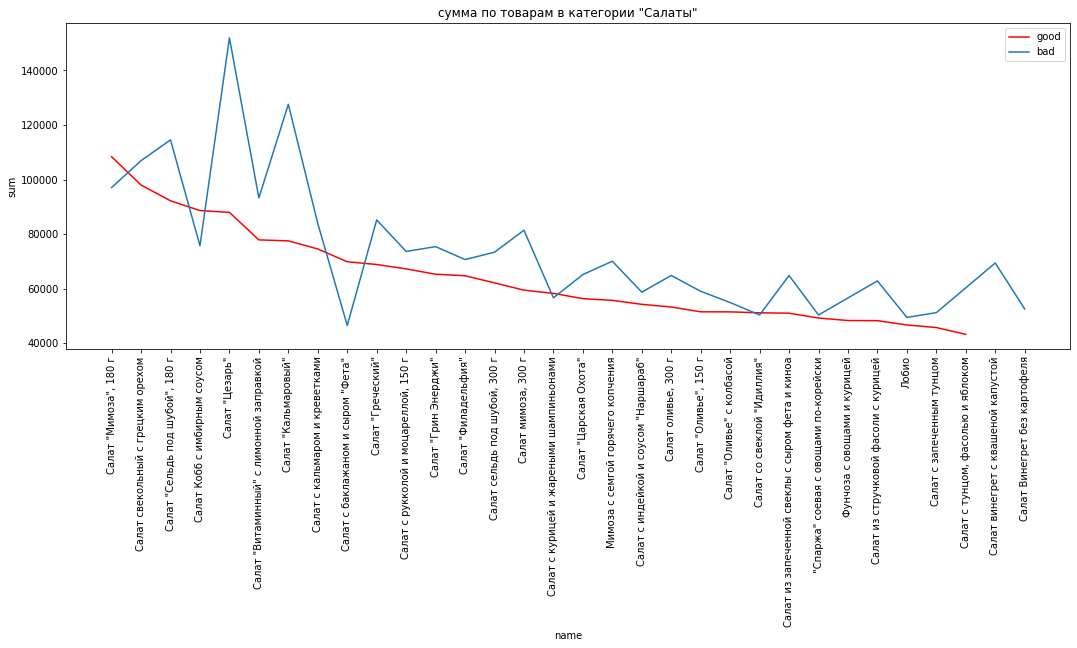

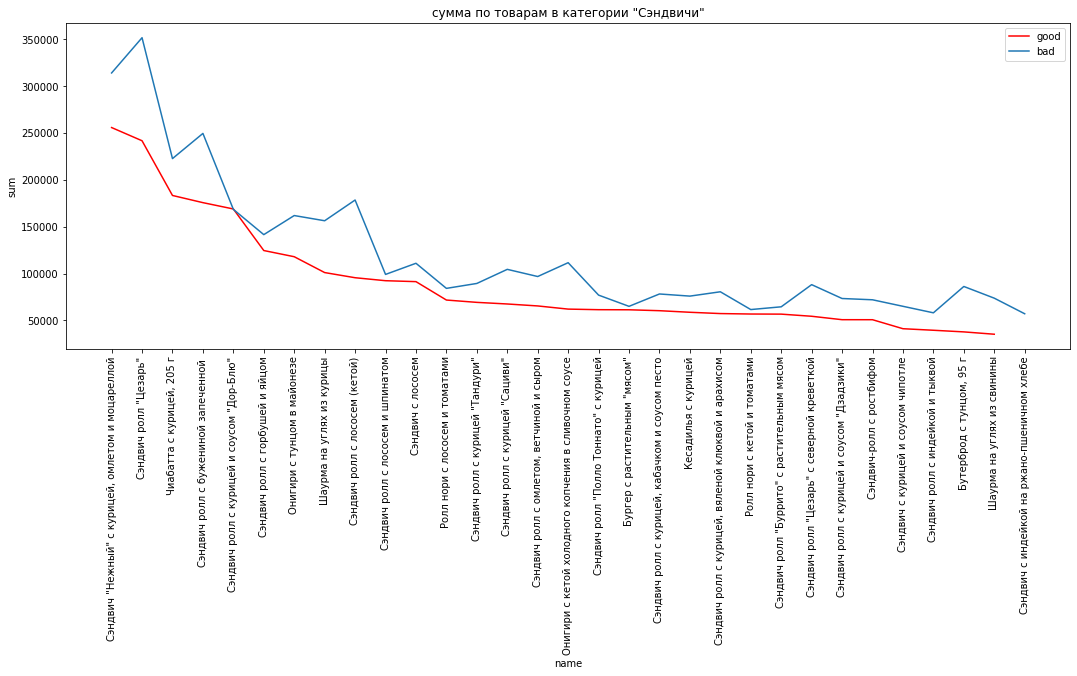

In [ ]:
category(("Вторые блюда", "Супы", "Салаты", "Сэндвичи"))

Проверю вручную, так как данные странные через функцию

In [ ]:
### Супы

In [ ]:
data_soup = data.query('name_gr2 =="Супы"')

In [ ]:
data_soup_good = data_soup.loc[data_soup['id_tt_cl'].isin(good)]

data_soup_good_sum = data_soup_good.groupby(['name_tov','checkuid'])['basesum'].sum().reset_index()

data_soup_good_table = data_soup_good_sum.groupby('name_tov').agg({'basesum':['sum', 'count', 'mean']}).reset_index()
data_soup_good_table.columns = ['name', 'sum', 'check_nunique', 'mean']
data_soup_good_table.sort_values(by = 'sum', ascending = False).head(20)
data_soup_good_table2 = data_soup_good_table.sort_values(by = 'sum', ascending = False).head(30)
data_soup_good_table2

,name,sum,check_nunique,mean
1,"Борщ ""Украинский""",186402.55,1524,122.31
2,Борщ с говядиной,121485.23,844,143.94
18,Суп-крем куриный,119822.47,868,138.04
25,Суп-пюре с грибами,95080.96,714,133.17
7,"Суп ""Гороховый"" с копчёностями",94802.72,651,145.63
8,"Суп ""Куриный"" с домашней лапшой",93724.79,754,124.30
0,"Борщ ""Вегетарианский""",88286.15,753,117.25
10,"Суп ""Харчо""",81587.31,561,145.43
9,"Суп ""Рассольник"" с курицей",77799.95,575,135.30
24,Суп-пюре норвежский с семгой,75204.17,447,168.24


In [ ]:
data_soup_bad = data_soup.loc[data_soup['id_tt_cl'].isin(bad)]
data_soup_bad_sum = data_soup_bad .groupby(['name_tov','checkuid'])['basesum'].sum().reset_index()
data_soup_bad_table = data_soup_bad_sum.groupby('name_tov').agg({'basesum':['sum', 'count', 'mean']}).reset_index()
data_soup_bad_table.columns = ['name', 'sum', 'check_nunique', 'mean']
data_soup_bad_table.sort_values(by = 'sum', ascending = False).head(30)
data_soup_bad_table2 = data_soup_bad_table.sort_values(by = 'sum', ascending = False).head(20)
data_soup_bad_table2

,name,sum,check_nunique,mean
1,"Борщ ""Украинский""",133530.11,1114,119.87
2,Борщ с говядиной,97782.27,698,140.09
0,"Борщ ""Вегетарианский""",87114.08,749,116.31
18,Суп-крем куриный,86772.20,652,133.09
8,"Суп ""Куриный"" с домашней лапшой",86463.57,684,126.41
25,Суп-пюре с грибами,80985.77,614,131.90
24,Суп-пюре норвежский с семгой,76847.20,438,175.45
20,"Суп-пюре ""Сырный"" с гренками, 260 г",70077.91,339,206.72
10,"Суп ""Харчо""",67008.95,459,145.99
17,Суп щавелевый с курицей,58539.40,462,126.71


In [ ]:
test_soup  = data_soup_good_table2.merge(data_soup_bad_table2, on = 'name', how = 'left')
test_soup['rate'] = test_soup['sum_x']/test_soup['sum_y']
test_soup.sort_values(by = 'rate', ascending = False)

,name,sum_x,check_nunique_x,mean_x,sum_y,check_nunique_y,mean_y,rate
11,Суп с фрикадельками из индейки,70164.00,553,126.88,27851.35,228.00,122.16,2.52
4,"Суп ""Гороховый"" с копчёностями",94802.72,651,145.63,50702.09,372.00,136.30,1.87
14,Солянка из семги и форели,43657.46,260,167.91,27988.32,172.00,162.72,1.56
15,Щи зеленые с говядиной,43235.69,282,153.32,28288.87,185.00,152.91,1.53
8,"Суп ""Рассольник"" с курицей",77799.95,575,135.30,54111.67,425.00,127.32,1.44
0,"Борщ ""Украинский""",186402.55,1524,122.31,133530.11,1114.00,119.87,1.40
2,Суп-крем куриный,119822.47,868,138.04,86772.20,652.00,133.09,1.38
13,Крем-суп с тыквой и индейкой,54448.45,364,149.58,39632.08,275.00,144.12,1.37
17,Похлебка грибная,38392.23,307,125.06,28508.15,237.00,120.29,1.35
18,Суп-крем овощной,34043.71,301,113.10,26257.27,226.00,116.18,1.30


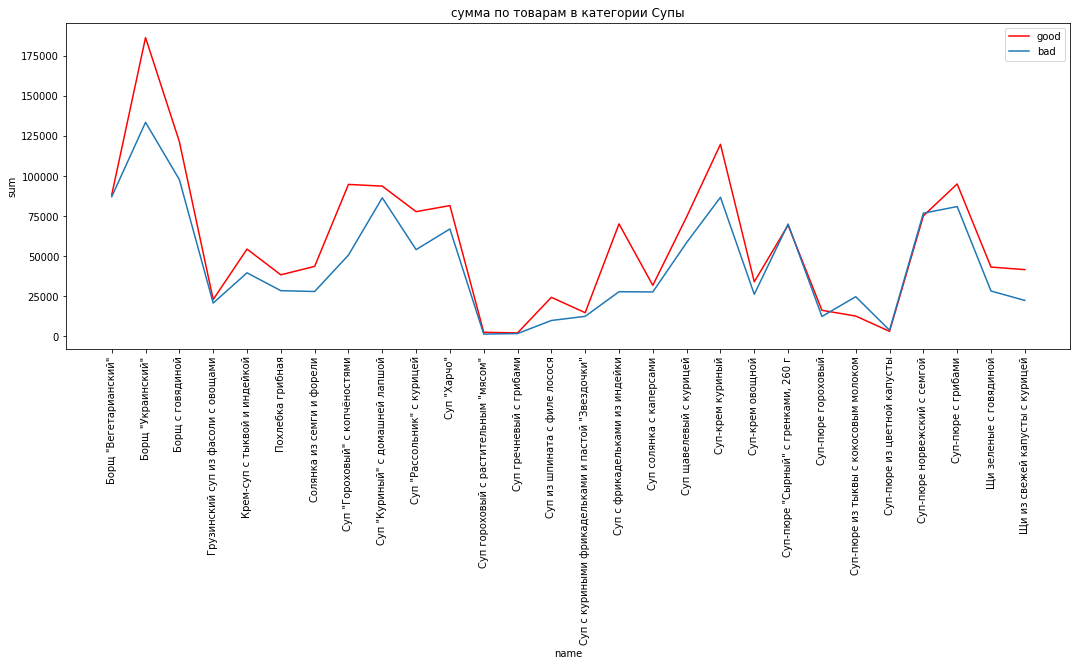

In [ ]:
fig = plt.figure(figsize=(18,6))
a = sns.lineplot(data=data_soup_good_table, x='name', y = 'sum', label = 'good', color='red')
a = sns.lineplot(data=data_soup_bad_table, x='name', y = 'sum', label = 'bad')
plt.title(f'сумма по товарам в категории Супы')
plt.xlabel('name')
plt.legend()
plt.xticks( rotation=90)
plt.show()

топ супов:
Суп с фрикадельками из индейки
Суп "Гороховый" с копчёностями	

Суп "Рассольник" с курицей	
Борщ "Украинский"	


In [ ]:
### Салаты

In [ ]:
data_salad = data.query('name_gr2 =="Салаты"')

In [ ]:
data_salad_good = data_salad.loc[data_salad['id_tt_cl'].isin(good)]

data_salad_good_sum = data_salad_good.groupby(['name_tov','checkuid'])['basesum'].sum().reset_index()

data_salad_good_table = data_salad_good_sum.groupby('name_tov').agg({'basesum':['sum', 'count', 'mean']}).reset_index()
data_salad_good_table.columns = ['name', 'sum', 'check_nunique', 'mean']
data_salad_good_table.sort_values(by = 'sum', ascending = False).head(50)
data_salad_good_table2 = data_salad_good_table.sort_values(by = 'sum', ascending = False).head(50)
data_salad_good_table2

,name,sum,check_nunique,mean
9,"Салат ""Мимоза"", 180 г",108368.52,819,132.32
45,Салат свекольный с грецким орехом,98001.92,1129,86.80
15,"Салат ""Сельдь под шубой"", 180 г",92224.12,761,121.19
22,Салат Кобб с имбирным соусом,88647.66,436,203.32
19,"Салат ""Цезарь""",87989.03,423,208.01
4,"Салат ""Витаминный"" с лимонной заправкой",77901.95,854,91.22
7,"Салат ""Кальмаровый""",77543.81,469,165.34
41,Салат с кальмаром и креветками,74573.83,356,209.48
38,"Салат с баклажаном и сыром ""Фета""",69886.77,420,166.40
5,"Салат ""Греческий""",68880.14,314,219.36


In [ ]:
data_salad_bad = data_salad.loc[data_salad['id_tt_cl'].isin(bad)]
data_salad_bad_sum = data_salad_bad .groupby(['name_tov','checkuid'])['basesum'].sum().reset_index()
data_salad_bad_table = data_salad_bad_sum.groupby('name_tov').agg({'basesum':['sum', 'count', 'mean']}).reset_index()
data_salad_bad_table.columns = ['name', 'sum', 'check_nunique', 'mean']
data_salad_bad_table.sort_values(by = 'sum', ascending = False).head(50)
data_salad_bad_table2 = data_salad_bad_table.sort_values(by = 'sum', ascending = False).head(50)
data_salad_bad_table2

,name,sum,check_nunique,mean
19,"Салат ""Цезарь""",151944.82,758,200.45
7,"Салат ""Кальмаровый""",127583.16,762,167.43
15,"Салат ""Сельдь под шубой"", 180 г",114548.96,916,125.05
44,Салат свекольный с грецким орехом,106940.03,1207,88.60
9,"Салат ""Мимоза"", 180 г",97088.89,748,129.80
4,"Салат ""Витаминный"" с лимонной заправкой",93272.08,1030,90.56
5,"Салат ""Греческий""",85222.70,388,219.65
40,Салат с кальмаром и креветками,83907.70,396,211.89
33,"Салат мимоза, 300 г",81431.99,422,192.97
22,Салат Кобб с имбирным соусом,75764.37,392,193.28


In [ ]:
test_salad  = data_salad_good_table.merge(data_salad_bad_table, on = 'name', how = 'left')
test_salad['rate'] = test_salad['sum_x']/test_salad['sum_y']
test_salad.sort_values(by = 'rate', ascending = False)

,name,sum_x,check_nunique_x,mean_x,sum_y,check_nunique_y,mean_y,rate
23,Салат азиатский с ростбифом и кунжутной заправкой,5272.65,26,202.79,2345.00,11.00,213.18,2.25
38,"Салат с баклажаном и сыром ""Фета""",69886.77,420,166.40,46539.12,298.00,156.17,1.50
36,Салат овощной с кешью и мятной заправкой,5697.03,40,142.43,4408.44,32.00,137.76,1.29
10,"Салат ""Норвежский"" с лососем",36884.17,205,179.92,28840.48,153.00,188.50,1.28
3,"Салат ""Витаминный микс""",2712.71,16,169.54,2244.61,16.00,140.29,1.21
22,Салат Кобб с имбирным соусом,88647.66,436,203.32,75764.37,392.00,193.28,1.17
48,Фунчоза с овощами и курицей,48348.05,349,138.53,42353.95,324.00,130.72,1.14
44,"Салат с тунцом, фасолью и яблоком",43280.68,316,136.96,38348.69,285.00,134.56,1.13
9,"Салат ""Мимоза"", 180 г",108368.52,819,132.32,97088.89,748.00,129.80,1.12
8,"Салат ""Коул Слоу"" из овощей",42728.28,452,94.53,40678.29,423.00,96.17,1.05


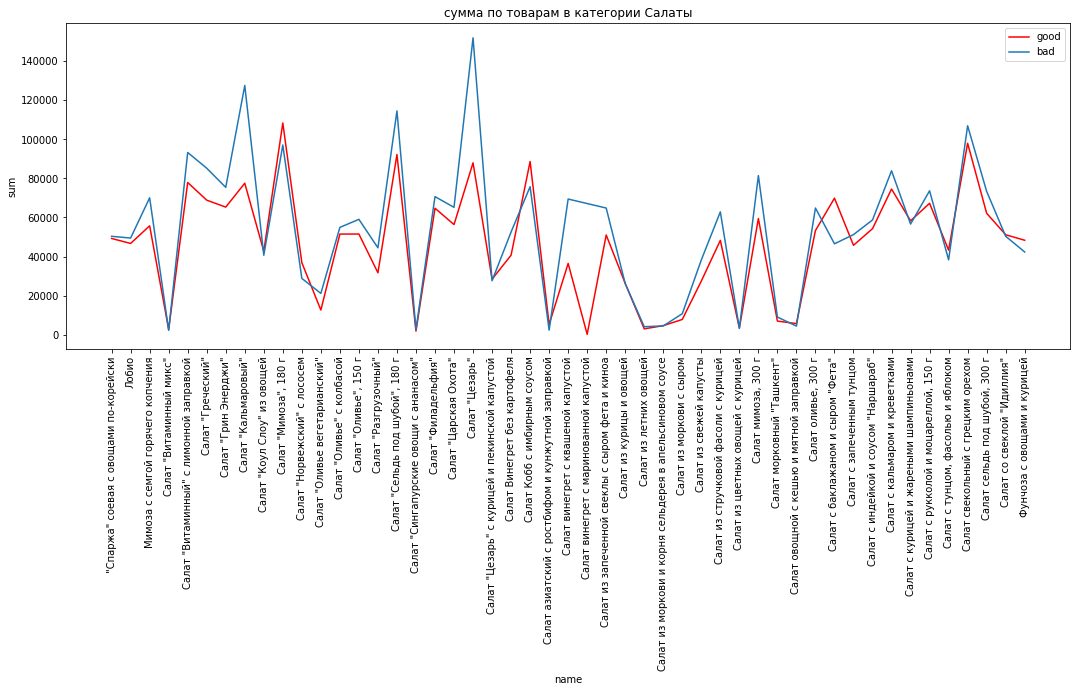

In [ ]:
fig = plt.figure(figsize=(18,6))
a = sns.lineplot(data=data_salad_good_table, x='name', y = 'sum', label = 'good', color='red')
a = sns.lineplot(data=data_salad_bad_table, x='name', y = 'sum', label = 'bad')
plt.title(f'сумма по товарам в категории Салаты')
plt.xlabel('name')
plt.legend()
plt.xticks( rotation=90)
plt.show()

In [ ]:
###Топ: салат с баклажаном и сырой фета 
### Салат Кобб с имбирным соусом и немного мимоза

### Сэндвичи

In [ ]:
data_sand = data.query('name_gr2 =="Сэндвичи"')

In [ ]:
data_sand_good = data_sand.loc[data_sand['id_tt_cl'].isin(good)]
data_sand_good_sum = data_sand_good.groupby(['name_tov','checkuid'])['basesum'].sum().reset_index()
data_sand_good_table = data_sand_good_sum.groupby('name_tov').agg({'basesum':['sum', 'count', 'mean']}).reset_index()
data_sand_good_table.columns = ['name', 'sum', 'check_nunique', 'mean']
data_sand_good_table.sort_values(by = 'sum', ascending = False)

,name,sum,check_nunique,mean
20,"Сэндвич ""Нежный"" с курицей, омлетом и моцареллой",255870.66,1457,175.61
25,"Сэндвич ролл ""Цезарь""",241790.24,1484,162.93
47,"Чиабатта с курицей, 205 г",183410.25,1056,173.68
27,Сэндвич ролл с бужениной запеченной,175745.26,1171,150.08
35,"Сэндвич ролл с курицей и соусом ""Дор-Блю""",169000.22,1047,161.41
28,Сэндвич ролл с горбушей и яйцом,124655.28,823,151.46
13,Онигири с тунцом в майонезе,118056.83,860,137.28
48,Шаурма на углях из курицы,101140.08,642,157.54
38,Сэндвич ролл с лососем (кетой),95638.41,567,168.67
39,Сэндвич ролл с лососем и шпинатом,92455.59,552,167.49


In [ ]:
data_sand_bad = data_sand.loc[data_sand['id_tt_cl'].isin(bad)]
data_sand_bad_sum = data_sand_bad.groupby(['name_tov','checkuid'])['basesum'].sum().reset_index()
data_sand_bad_table = data_sand_bad_sum.groupby('name_tov').agg({'basesum':['sum', 'count', 'mean']}).reset_index()
data_sand_bad_table.columns = ['name', 'sum', 'check_nunique', 'mean']
data_sand_bad_table.sort_values(by = 'sum', ascending = False)

,name,sum,check_nunique,mean
25,"Сэндвич ролл ""Цезарь""",351724.80,2100,167.49
20,"Сэндвич ""Нежный"" с курицей, омлетом и моцареллой",314125.71,1815,173.07
27,Сэндвич ролл с бужениной запеченной,249606.81,1682,148.40
47,"Чиабатта с курицей, 205 г",222749.29,1299,171.48
38,Сэндвич ролл с лососем (кетой),178541.20,1047,170.53
35,"Сэндвич ролл с курицей и соусом ""Дор-Блю""",168578.99,1066,158.14
13,Онигири с тунцом в майонезе,161976.62,1201,134.87
48,Шаурма на углях из курицы,156430.75,973,160.77
28,Сэндвич ролл с горбушей и яйцом,141616.43,938,150.98
12,Онигири с кетой холодного копчения в сливочном...,111682.27,796,140.30


In [ ]:
test_sand  = data_sand_good_table.merge(data_sand_bad_table, on = 'name', how = 'left')
test_sand['rate'] = test_sand['sum_x']/test_sand['sum_y']
test_sand.sort_values(by = 'rate', ascending = False)

,name,sum_x,check_nunique_x,mean_x,sum_y,check_nunique_y,mean_y,rate
31,Сэндвич ролл с индейкой су-вид,2061.82,14,147.27,1511.97,10,151.20,1.36
3,Бургер с пастрами,4888.42,26,188.02,3630.64,21,172.89,1.35
1,Бургер рыбный с треской,6009.46,32,187.80,5064.57,33,153.47,1.19
6,Буррито с курицей,5874.11,31,189.49,5011.98,28,179.00,1.17
35,"Сэндвич ролл с курицей и соусом ""Дор-Блю""",169000.22,1047,161.41,168578.99,1066,158.14,1.00
19,"Сэндвич ""Клаб""",7806.11,64,121.97,8020.91,62,129.37,0.97
4,"Бургер с растительным ""мясом""",61432.35,278,220.98,65109.95,303,214.88,0.94
29,Сэндвич ролл с жареной рыбой,11055.75,50,221.11,11723.51,51,229.87,0.94
39,Сэндвич ролл с лососем и шпинатом,92455.59,552,167.49,99168.81,595,166.67,0.93
22,"Сэндвич ролл ""Гавайский"" с курицей",28458.15,180,158.10,30708.58,195,157.48,0.93


In [ ]:
test_sand2 = test_sand.query('sum_x >= 50000')
test_sand2.sort_values(by = 'rate', ascending = False)

,name,sum_x,check_nunique_x,mean_x,sum_y,check_nunique_y,mean_y,rate
35,"Сэндвич ролл с курицей и соусом ""Дор-Блю""",169000.22,1047,161.41,168578.99,1066,158.14,1.00
4,"Бургер с растительным ""мясом""",61432.35,278,220.98,65109.95,303,214.88,0.94
39,Сэндвич ролл с лососем и шпинатом,92455.59,552,167.49,99168.81,595,166.67,0.93
16,Ролл нори с кетой и томатами,56909.62,336,169.37,61670.07,354,174.21,0.92
28,Сэндвич ролл с горбушей и яйцом,124655.28,823,151.46,141616.43,938,150.98,0.88
21,"Сэндвич ролл ""Буррито"" с растительным мясом",56792.25,305,186.20,64605.96,349,185.12,0.88
17,Ролл нори с лососем и томатами,71827.79,424,169.41,84282.85,496,169.93,0.85
44,Сэндвич с лососем,91464.61,491,186.28,111059.13,595,186.65,0.82
47,"Чиабатта с курицей, 205 г",183410.25,1056,173.68,222749.29,1299,171.48,0.82
20,"Сэндвич ""Нежный"" с курицей, омлетом и моцареллой",255870.66,1457,175.61,314125.71,1815,173.07,0.81


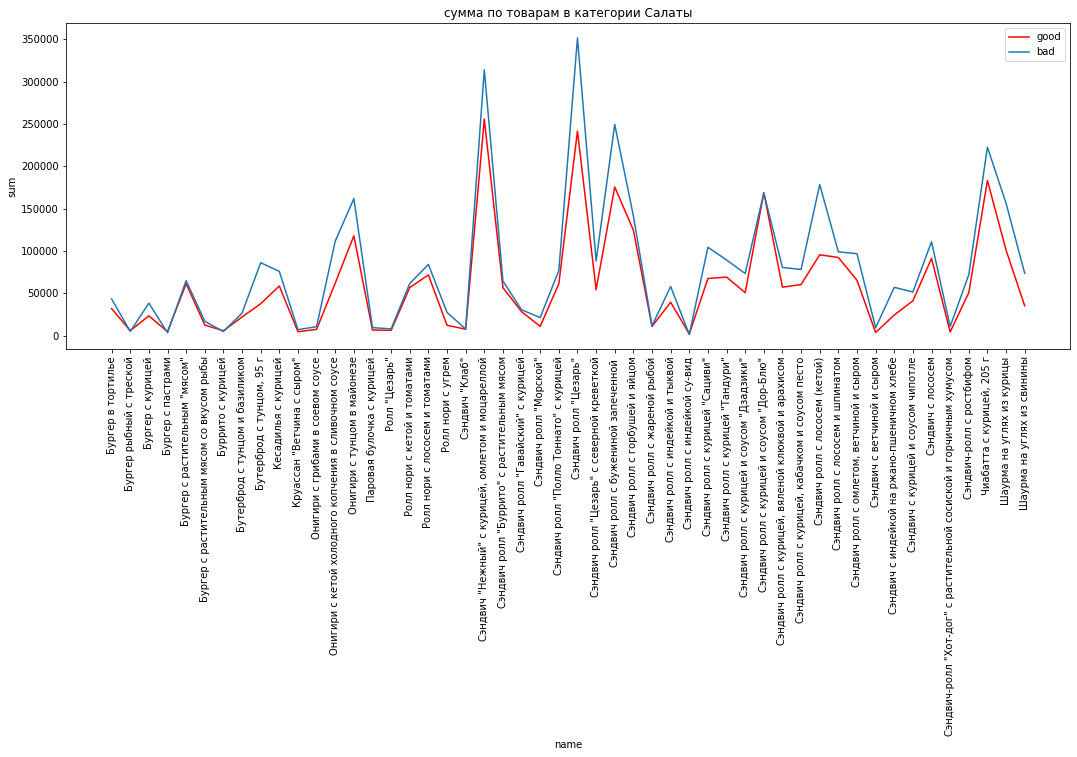

In [ ]:
fig = plt.figure(figsize=(18,6))
a = sns.lineplot(data=data_sand_good_table, x='name', y = 'sum', label = 'good', color='red')
a = sns.lineplot(data=data_sand_bad_table, x='name', y = 'sum', label = 'bad')
plt.title(f'сумма по товарам в категории Салаты')
plt.xlabel('name')
plt.legend()
plt.xticks( rotation=90)
plt.show()

## Анализ на зеленые ценники

In [ ]:
### загрузка данных
price = pd.read_csv('/content/drive/MyDrive/vkusvill/price_tt.csv')

In [ ]:
price['id_tt_cl'] = price['id_tt_cl'].astype('str')
price['green_price'] = price['green_price'].astype('int')

In [ ]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2608847 entries, 0 to 2608846
Data columns (total 21 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   Unnamed: 0.1        int64  
 2   CheckLineUID        object 
 3   CheckUID            object 
 4   CashCheckLineNo     int64  
 5   BasePrice           float64
 6   Quantity            float64
 7   BaseSum             float64
 8   id_tt_cl            object 
 9   id_tov_cl           int64  
 10  date_ch             object 
 11  time_ch             object 
 12  OperationType_cl    int64  
 13  znak                int64  
 14  Price_retail        float64
 15  BonusCard_cl        object 
 16  id_lovepr_card_tov  float64
 17  id_discount_chl     float64
 18  NameForClient       object 
 19  green_price         int64  
 20  type_order          object 
dtypes: float64(6), int64(7), object(8)
memory usage: 418.0+ MB


In [ ]:
price.head(3)

,Unnamed: 0,Unnamed: 0.1,CheckLineUID,CheckUID,CashCheckLineNo,BasePrice,Quantity,BaseSum,id_tt_cl,id_tov_cl,...,time_ch,OperationType_cl,znak,Price_retail,BonusCard_cl,id_lovepr_card_tov,id_discount_chl,NameForClient,green_price,type_order
0,121,121,017B9B68-9A97-EC11-9064-005056A7A8DF,007B9B68-9A97-EC11-9064-005056A7A8DF,1,5.00,1.00,5.00,11616,647,...,09:54:29.0000000,1,1,5.00,2180102,NaN,NaN,NaN,0,ofline
1,122,122,057B9B68-9A97-EC11-9064-005056A7A8DF,007B9B68-9A97-EC11-9064-005056A7A8DF,3,69.09,2.00,138.18,11616,17736,...,09:54:29.0000000,1,1,69.09,2180102,NaN,NaN,NaN,0,ofline
2,123,123,037B9B68-9A97-EC11-9064-005056A7A8DF,007B9B68-9A97-EC11-9064-005056A7A8DF,2,69.09,2.00,138.18,11616,17736,...,09:54:29.0000000,1,1,69.09,2180102,NaN,NaN,NaN,0,ofline


In [ ]:
price = price.query('type_order =="ofline"')

In [ ]:
del price['Unnamed: 0.1']

In [ ]:
price.columns = price.columns.str.lower()

In [ ]:
price['id_tov_cl'].nunique()

5449

In [ ]:
price['id_tov_cl'] = price['id_tov_cl'].astype('str')

In [ ]:
data2['id_tov_cl'].nunique()

255

In [ ]:
data_second.head(3)

,checkuid,id_tt_cl,id_tov_cl,price_retail,quantity,baseprice,basesum,date_ch,time_ch,order_type,low_sale,month,name_tov,id_group,name_gr,id_group2,name_gr2,day
22,0BB4D3CD-8691-EC11-9064-005056A7A8DF,10864,20969,165.00,1.00,165.00,165.00,2022-02-19,16:05:53.0000000,offline,0,2,Котлета куриная с картофельным пюре,10133.00,Кулинария,10223.00,Вторые блюда,5
23,25C069A9-9791-EC11-9064-005056A7A8DF,10864,20969,165.00,1.00,165.00,165.00,2022-02-19,18:07:22.0000000,offline,0,2,Котлета куриная с картофельным пюре,10133.00,Кулинария,10223.00,Вторые блюда,5
24,A8E1161F-9391-EC11-9064-005056A7A8DF,10864,20969,165.00,1.00,165.00,165.00,2022-02-19,17:41:43.0000000,offline,0,2,Котлета куриная с картофельным пюре,10133.00,Кулинария,10223.00,Вторые блюда,5


In [ ]:
data_second['id_tov_cl'] = data_second['id_tov_cl'].astype('str')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_second.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407126 entries, 22 to 17033935
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   checkuid      407126 non-null  object        
 1   id_tt_cl      407126 non-null  object        
 2   id_tov_cl     407126 non-null  object        
 3   price_retail  407126 non-null  float64       
 4   quantity      407126 non-null  float64       
 5   baseprice     407126 non-null  float64       
 6   basesum       407126 non-null  float64       
 7   date_ch       407126 non-null  datetime64[ns]
 8   time_ch       407126 non-null  object        
 9   order_type    407126 non-null  object        
 10  low_sale      407126 non-null  int64         
 11  month         407126 non-null  int64         
 12  name_tov      407126 non-null  object        
 13  id_group      407126 non-null  float64       
 14  name_gr       407126 non-null  object        
 15  id_group2     

In [ ]:
price_second = data_second.merge(price[['green_price', 'price_retail','checkuid' ]], how = 'left', on = 'checkuid')

In [ ]:
price_second.sample(3)

,checkuid,id_tt_cl,id_tov_cl,price_retail_x,quantity,baseprice,basesum,date_ch,time_ch,order_type,low_sale,month,name_tov,id_group,name_gr,id_group2,name_gr2,day,green_price,price_retail_y
458627,50E38811-3BBB-EC11-9064-005056A7A8DF,11160,22490,220.00,1.00,132.00,132.00,2022-04-13,17:55:04,offline,0,4,Куриный кармашек с картофелем и розмарином,10133.00,Кулинария,10223.00,Вторые блюда,2,NaN,NaN
103998,96EC59BE-0289-EC11-9064-005056A7A8DF,12533,51915,243.64,1.00,243.64,243.64,2022-02-08,20:04:54.0000000,offline,1,2,Вок фунчоза с креветками,10133.00,Кулинария,10223.00,Вторые блюда,1,NaN,NaN
232493,E5623FBE-3DA2-EC11-9064-005056A7A8DF,11616,24513,205.00,1.00,123.00,123.00,2022-03-12,22:50:11,offline,0,3,Бефстроганов из говядины с картофельным пюре,10133.00,Кулинария,10223.00,Вторые блюда,5,1.00,234.55


In [ ]:
price_second['green_price'].value_counts()

0.00    259942
1.00     26623
Name: green_price, dtype: int64

####10%

In [ ]:
bad_sec = price_second[price_second['id_tt_cl'].isin((bad))].groupby(['name_tov','checkuid', 'green_price'])['basesum'].sum().reset_index()
        
good_sec = price_second[price_second['id_tt_cl'].isin((good))].groupby(['name_tov','checkuid', 'green_price'])['basesum'].sum().reset_index()

In [ ]:
bad_sec

,name_tov,checkuid,green_price,basesum
0,"""Не пельмени"" с постным соусом",09C3A71E-3BB0-EC11-9064-005056A7A8DF,1.00,134.00
1,"""Не пельмени"" с постным соусом",1BD827C8-29B0-EC11-9064-005056A7A8DF,0.00,1563.33
2,"""Не пельмени"" с постным соусом",1BD827C8-29B0-EC11-9064-005056A7A8DF,1.00,446.67
3,"""Не пельмени"" с постным соусом",3104D995-3BB0-EC11-9064-005056A7A8DF,0.00,446.67
4,"""Не пельмени"" с постным соусом",53B7820A-A2AE-EC11-9064-005056A7A8DF,0.00,223.33
...,...,...,...,...
27581,Шницель куриный в яйце с картофельным пюре,DCD4AC2E-FCC9-EC11-9064-005056A7A8DF,0.00,360.00
27582,Шницель куриный в яйце с картофельным пюре,E805DFEC-15CA-EC11-9064-005056A7A8DF,0.00,360.00
27583,Шницель куриный в яйце с картофельным пюре,EC57CCBD-CDCF-EC11-9064-005056A7A8DF,0.00,1440.00
27584,Шницель куриный в яйце с картофельным пюре,FB3AB0F5-97CE-EC11-9064-005056A7A8DF,0.00,360.00


In [ ]:
bad_sec2 = price_second[price_second['id_tt_cl'].isin((bad))].groupby('green_price')['basesum'].sum().reset_index()

In [ ]:
bad_sec2

,green_price,basesum
0,0.00,22165483.10
1,1.00,1554177.91


In [ ]:
#7,0%

In [ ]:
bad_sec2['green_price'] = bad_sec2['green_price'].astype('int')

In [ ]:
good_sec2 = price_second[price_second['id_tt_cl'].isin((good))].groupby('green_price')['basesum'].sum().reset_index()

In [ ]:
good_sec2 

,green_price,basesum
0,0.00,26518565.98
1,1.00,1803904.38


In [ ]:
###6,8%

In [ ]:
price_bad = price[price['id_tt_cl'].isin((bad))].groupby('green_price')['basesum'].sum().reset_index()

In [ ]:
price_bad 

,green_price,basesum
0,0,153098511.48
1,1,9606714.18


In [ ]:
##6,2

In [ ]:
price_bad = price[price['id_tt_cl'].isin((bad))].groupby('green_price')['quantity'].count().reset_index()
price_bad 

,green_price,quantity
0,0,1231262
1,1,99657


In [ ]:
##8%

In [ ]:
price_good = price[price['id_tt_cl'].isin((good))].groupby('green_price')['basesum'].sum().reset_index()
price_good

,green_price,basesum
0,0,144846655.06
1,1,7810645.79


In [ ]:
##5,3

In [ ]:
price_good = price[price['id_tt_cl'].isin((good))].groupby('green_price')['quantity'].count().reset_index()
price_good

,green_price,quantity
0,0,1130371
1,1,80358


In [ ]:
##7.1

In [ ]:
price_sand = data_sand.merge(price[['green_price', 'price_retail','checkuid' ]], how = 'left', on = 'checkuid')

In [ ]:
price_sand['green_price'].value_counts()

0.00    171156
1.00     12941
Name: green_price, dtype: int64

In [ ]:
bad_sand2 = price_sand[price_sand['id_tt_cl'].isin((bad))].groupby('green_price')['basesum'].sum().reset_index()
bad_sand2 

,green_price,basesum
0,0.00,15267009.06
1,1.00,835037.14


In [ ]:
5,4

(5, 4)

In [ ]:
good_sand2 = price_sand[price_sand['id_tt_cl'].isin((good))].groupby('green_price')['basesum'].sum().reset_index()
good_sand2 

,green_price,basesum
0,0.00,12962080.95
1,1.00,741174.27


In [ ]:
5,7

(5, 7)

### объединенный файл

In [ ]:
tt = pd.read_csv('/content/drive/MyDrive/vkusvill/Копия df_tg_disc.csv')

In [ ]:
tt.head(3)

,checkuid,id_tt_cl,id_tov_cl,order_type,format,turn_category,growth_category,name_tov,name_gr,name_gr2,...,basesum,bonuscard_cl,id_lovepr_card_tov,id_discount_chl,nameforclient,green_price,month,day,hour,time
0,000007D9-E6A2-EC11-9064-005056A7A8DF,14815,25292,offline,ВкусВилл,>40 ml,>4%,"Салат ""Сельдь под шубой"", 180 г",Кулинария,Салаты,...,115.00,,NaN,NaN,без скидки,NaN,3,6,18,2022-07-16 18:49:04
1,000007D9-E6A2-EC11-9064-005056A7A8DF,14815,34120,offline,ВкусВилл,>40 ml,>4%,Паста с курицей гриль и сливочно-томатным соусом,Кулинария,Вторые блюда,...,173.33,,NaN,NaN,без скидки,NaN,3,6,18,2022-07-16 18:49:04
2,000007D9-E6A2-EC11-9064-005056A7A8DF,14815,59037,offline,ВкусВилл,>40 ml,>4%,Шницель куриный в сырной панировке с макаронами,Кулинария,Вторые блюда,...,207.27,,NaN,NaN,без скидки,NaN,3,6,18,2022-07-16 18:49:04


In [ ]:
tt['basesum'].corr(tt['green_price'])

-0.43191585053804366

Посмотрим категории теперь сначала

In [ ]:
df.head(5)

,checkuid,id_tt_cl,id_tov_cl,price_retail,quantity,baseprice,basesum,date_ch,time_ch,order_type,low_sale,month,name_tov,id_group,name_gr,id_group2,name_gr2
0,EF41A20A-7791-EC11-9064-005056A7A8DF,10864,20698,190.91,1.00,152.73,152.73,2022-02-19,14:15:15.0000000,offline,0,2,"Творог ""Пластовой"" из цельного молока",33.00,Молочная Продукция,10855.00,Творог классика
1,74FCDBB4-A991-EC11-9064-005056A7A8DF,10864,20738,195.83,1.00,156.67,141.00,2022-02-19,20:20:23.0000000,offline,0,2,"Наполнитель для кошачьего туалета, комкующийся",10245.00,Товары для животных,10889.00,Сопутствующие товары
2,BDD56F5F-8E91-EC11-9064-005056A7A8DF,10864,20738,195.83,1.00,195.83,195.83,2022-02-19,17:05:33.0000000,online,0,2,"Наполнитель для кошачьего туалета, комкующийся",10245.00,Товары для животных,10889.00,Сопутствующие товары
3,1F3E69CE-9991-EC11-9064-005056A7A8DF,10864,20741,99.17,1.00,72.46,72.46,2022-02-19,18:28:08.0000000,offline,0,2,"Прокладки ультратонкие NORMAL PLUS, 8 шт",10878.00,Личная гигиена и уход,10880.00,Личная гигиена
4,1F3E69CE-9991-EC11-9064-005056A7A8DF,10864,20743,99.17,1.00,90.77,90.77,2022-02-19,18:28:08.0000000,offline,0,2,"Прокладки ультратонкие NORMAL, 10 шт",10878.00,Личная гигиена и уход,10880.00,Личная гигиена


In [ ]:
df['order_type'].unique()

array(['offline', 'online'], dtype=object)

In [ ]:
df['name_gr'].unique()

array(['Молочная Продукция', 'Товары для животных',
       'Личная гигиена и уход', 'Торты, пирожные, десерты',
       'Мясо. Птица. П/ф охл. Яйца', 'Замороженные продукты',
       'Сладости, кондитерские изделия', 'Кулинария', 'Консервация',
       'Хлеб', 'Мясные деликатесы. Колбасы', 'Сыры', 'Бакалея',
       'Овощи. Фрукты. Грибы. Зелень', 'Замороженные десерты', 'Напитки',
       'Рыба. Морепродукты', 'Косметика', nan, 'Детское питание',
       'Товары для дома', 'Детские товары',
       'Сухофрукты. Сушеные овощи, грибы, ягоды. Орехи', 'Алкоголь',
       'Бытовая Химия', 'Прочее', 'Медицинские товары',
       'Отдел без упаковки', 'Айс ВкусВилл', 'Кафе', 'Микромаркет',
       'Подписки на товары и услуги', 'Пространство ВкусВилл',
       'Мировые бренды', 'Товары для Еком контрагентов', 'Фрешбар',
       'Выбор покупателя', 'Архив', 'Гастрополка', 'Рыбная витрина',
       'Электронная Коммерция', 'Проекты нон-фуд', 'Рационы',
       'Интернет-магазин', 'ФС Общепит', 'ВВ Праздник'

In [ ]:
df['id_tt_cl'] = df['id_tt_cl'].astype('str')

In [ ]:
good_sum_df = df[df['id_tt_cl'].isin((good))].groupby(['name_gr2','checkuid'])['basesum'].sum().reset_index()
good_sum_df


,name_gr2,checkuid,basesum
0,Авокадо,0000C059-94AD-EC11-9064-005056A7A8DF,234.55
1,Авокадо,000CE3C0-1FA5-EC11-9064-005056A7A8DF,116.36
2,Авокадо,00119326-BBB1-EC11-9064-005056A7A8DF,232.73
3,Авокадо,00381341-7999-EC11-9064-005056A7A8DF,116.36
4,Авокадо,003A2132-87C3-EC11-9064-005056A7A8DF,122.73
...,...,...,...
734136,Яйца,FFE6DA75-9F91-EC11-9064-005056A7A8DF,72.00
734137,Яйца,FFE6F272-4792-EC11-9064-005056A7A8DF,108.18
734138,Яйца,FFEA3C49-C2C7-EC11-9064-005056A7A8DF,109.09
734139,Яйца,FFFBF8E6-B3CE-EC11-9064-005056A7A8DF,69.09


In [ ]:
good_table_df = good_sum_df.groupby('name_gr2').agg({'basesum':['sum', 'count', 'mean']}).reset_index()
good_table_df.columns = ['name', 'sum', 'check_nunique', 'mean']
good_table_df.sort_values(by = 'sum', ascending = False)

,name,sum,check_nunique,mean
25,Вторые блюда,5068329.26,22184,228.47
223,Сэндвичи,3021961.94,16512,183.02
228,Томаты,2471233.11,13323,185.49
97,Курица,2388878.79,8258,289.28
179,Салаты,2333452.12,14859,157.04
...,...,...,...,...
90,Кофе и чай для кафе,110.83,1,110.83
187,"Сладости, пирожное ММ",68.95,2,34.48
123,Напитки айс,51.67,1,51.67
222,Сырье для пекарни,45.45,1,45.45


In [ ]:
good_table_df['sum'].median()

191248.400757341

In [ ]:
good_table_df['sum'].mean()

395988.9957942857

In [ ]:
good_table_df['sum'].describe()

count       261.00
mean     395989.00
std      574334.08
min           0.00
25%       62019.49
50%      191248.40
75%      482522.31
max     5068329.26
Name: sum, dtype: float64

In [ ]:
good_table_df[good_table_df['sum'] >=5000000]

,name,sum,check_nunique,mean
25,Вторые блюда,5068329.26,22184,228.47


In [ ]:
bad_sum_df = df[df['id_tt_cl'].isin((bad))].groupby(['name_gr2','checkuid'])['basesum'].sum().reset_index()
bad_sum_df


,name_gr2,checkuid,basesum
0,Авокадо,000198CD-28A5-EC11-9064-005056A7A8DF,106.36
1,Авокадо,000AF5E2-52BB-EC11-9064-005056A7A8DF,245.45
2,Авокадо,000AF90C-96AB-EC11-9064-005056A7A8DF,118.18
3,Авокадо,000EC4E6-47A1-EC11-9064-005056A7A8DF,163.64
4,Авокадо,001E2C36-C8C3-EC11-9064-005056A7A8DF,131.82
...,...,...,...
810710,Яйца,FFCC5ECA-4AB0-EC11-9064-005056A7A8DF,109.09
810711,Яйца,FFCF4C40-39B3-EC11-9064-005056A7A8DF,109.09
810712,Яйца,FFDB4838-BDAA-EC11-9064-005056A7A8DF,87.27
810713,Яйца,FFE5DA7A-C4CE-EC11-9064-005056A7A8DF,131.82


In [ ]:
bad_table_df = bad_sum_df.groupby('name_gr2').agg({'basesum':['sum', 'count', 'mean']}).reset_index()
bad_table_df.columns = ['name', 'sum', 'check_nunique', 'mean']
bad_table_df.sort_values(by = 'sum', ascending = False)

,name,sum,check_nunique,mean
26,Вторые блюда,4414314.90,20136,219.23
230,Сэндвичи,4028886.92,22369,180.11
233,Творог классика,3064789.99,18049,169.80
186,Салаты,2612356.98,16624,157.14
235,Томаты,2469920.02,13906,177.62
...,...,...,...,...
79,Кафе-кулинария Проект,136.00,1,136.00
95,Кофе и чай для кафе,100.00,1,100.00
77,Канцтовары (МБ),85.00,1,85.00
131,Напитки Фрешбар,81.82,1,81.82


In [ ]:
bad_table_df['sum'].describe()

count       265.00
mean     410895.01
std      608262.98
min           0.00
25%       55517.30
50%      190594.72
75%      490514.32
max     4414314.90
Name: sum, dtype: float64

In [ ]:
compare_df = good_table_df.merge(bad_table_df, on = 'name', how = 'left')
compare_df = compare_df.query('sum_x > 190000')
compare_df['rate'] = compare_df['sum_x']/compare_df['sum_y']
compare_df.sort_values(by = 'rate', ascending = False)
#x - good, y-bad

,name,sum_x,check_nunique_x,mean_x,sum_y,check_nunique_y,mean_y,rate
161,Продажа услуг,320722.51,2583,124.17,16514.17,134.00,123.24,19.42
47,Детская гигиена,232848.28,601,387.43,124023.85,403.00,307.75,1.88
168,Пюре фруктовое детское питание,409638.61,3230,126.82,266902.49,2340.00,114.06,1.53
132,"Оливки, маслины",217987.93,1547,140.91,145072.19,997.00,145.51,1.50
259,Ягоды,1948878.40,4533,429.93,1317531.65,3294.00,399.98,1.48
...,...,...,...,...,...,...,...,...
213,Сырки творожные,254086.73,3386,75.04,387023.70,5141.00,75.28,0.66
226,Творог классика,1890109.88,11849,159.52,3064789.99,18049.00,169.80,0.62
78,Кефир,739864.84,10281,71.96,1202607.76,16352.00,73.54,0.62
79,Кисломолочные продукты,275568.60,4225,65.22,458508.87,6748.00,67.95,0.60


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text major ticklabel objects>)

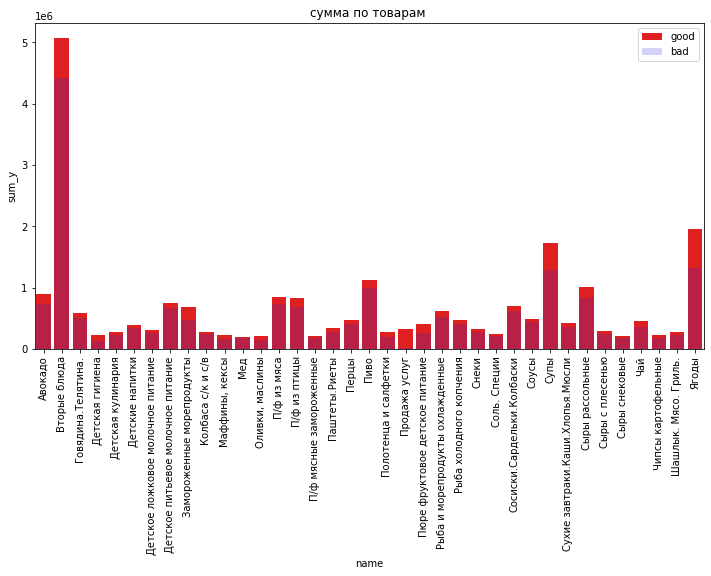

In [ ]:
fig = plt.figure(figsize=(12,6))
g = sns.barplot(data=compare_df.query('rate >1.1'), x='name', y='sum_x', color='red', label='good')
g = sns.barplot(data=compare_df.query('rate >1.1'), x='name', y='sum_y', color='blue', label='bad', alpha = 0.2)
plt.title("сумма по товарам ", size=12)
plt.xlabel('name')
plt.legend()
plt.xticks( rotation=90)

In [ ]:
test = df[df['name_gr2'] == "Продажа услуг"]

In [ ]:
test['order_type'].unique()

array(['online'], dtype=object)

In [ ]:
test.head(3)

,checkuid,id_tt_cl,id_tov_cl,price_retail,quantity,baseprice,basesum,date_ch,time_ch,order_type,low_sale,month,name_tov,id_group,name_gr,id_group2,name_gr2
18605,D8B1371B-4B91-EC11-9064-005056A7A8DF,11357,49220,124.17,1.00,124.17,124.17,2022-02-19,09:12:31.0000000,online,0,2,Экспресс доставка,10365.00,Пространство ВкусВилл,10364.00,Продажа услуг
18606,9F305447-3BE6-45F5-8515-1E5376416E43,11357,49220,124.17,1.00,124.17,124.17,2022-02-19,09:23:32.0000000,online,0,2,Экспресс доставка,10365.00,Пространство ВкусВилл,10364.00,Продажа услуг
18607,4C42F04B-4E91-EC11-9064-005056A7A8DF,11357,49220,124.17,1.00,124.17,124.17,2022-02-19,09:35:13.0000000,online,0,2,Экспресс доставка,10365.00,Пространство ВкусВилл,10364.00,Продажа услуг


In [ ]:
df.groupby('order_type')['name_tov'].count()

order_type
offline    16246294
online       692205
Name: name_tov, dtype: int64

In [ ]:
bada = df[df['id_tt_cl'].isin((bad))].groupby('order_type')['basesum'].sum().reset_index()
bada 

,order_type,basesum
0,offline,108151837.16
1,online,1509657.48


In [ ]:
1509657.48/108151837.16*100

1.3958685489240559

In [ ]:
df[df['id_tt_cl'].isin((good))].groupby('order_type')['basesum'].sum()

order_type
offline   98717862.96
online     5368939.26
Name: basesum, dtype: float64

In [ ]:
 5368939.26/98717862.96*100

5.438670468560962

In [ ]:
test_bad = test[test['id_tt_cl'].isin((bad))].groupby('id_tov_cl')['basesum'].sum()
test_good = test[test['id_tt_cl'].isin((good))].groupby('id_tov_cl')['basesum'].sum()

In [ ]:
test_bad

id_tov_cl
49220   16514.17
Name: basesum, dtype: float64

In [ ]:
test_good

id_tov_cl
49220   320722.51
Name: basesum, dtype: float64

In [ ]:
test['date_ch'] = pd.to_datetime(test['date_ch'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test['day'] =  test['date_ch'].dt.weekday

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


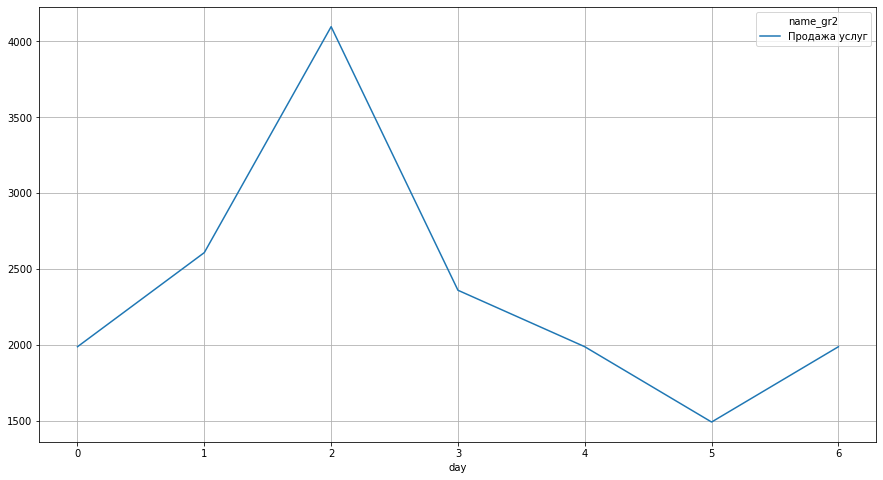

In [ ]:
tov_bad_df = test[test['id_tt_cl'].isin((bad))].pivot_table(index = 'day', columns = 'name_gr2', values = 'basesum', aggfunc = 'sum' ).plot(figsize=(15, 8), grid=True)

plt.show()

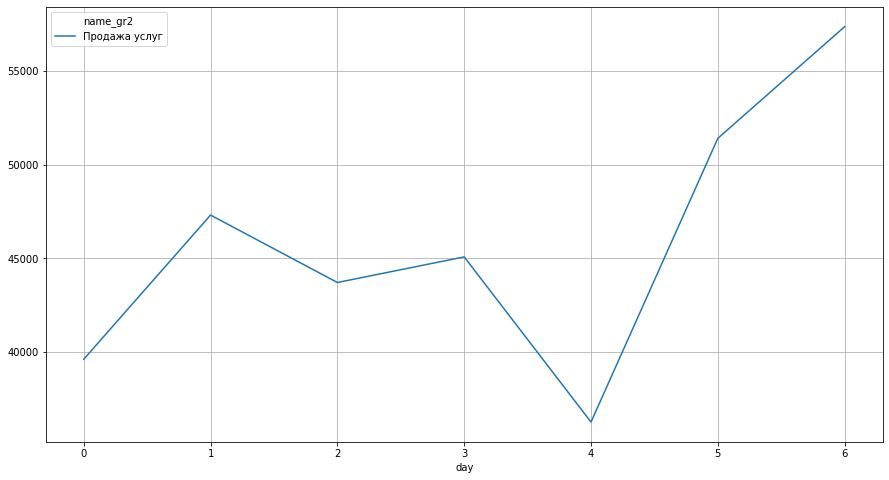

In [ ]:
tov_goog_df = test[test['id_tt_cl'].isin((good))].pivot_table(index = 'day', columns = 'name_gr2', values = 'basesum', aggfunc = 'sum' ).plot(figsize=(15, 8), grid=True)

plt.show()

In [4]:
#загрузка дф с общими продажами по каждой точке
sales = pd.read_csv('/content/drive/MyDrive/Vkusville/tt_grouped.csv')

FileNotFoundError: ignored

In [ ]:
#расчет выручки по каждой точке (февраль-май)
temp = (
    tt_grouped.groupby('id_tt_cl', as_index=False)['basesum'].sum()
)
temp

In [ ]:
#смотрим распределение
sns.boxplot(temp['basesum'])


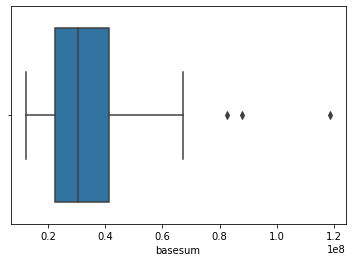

In [6]:
from IPython.display import Image
Image('bp.png')

In [ ]:
# категорезируем точки по обороту: < 20 мл, от 20 до 40 мл, >40 мл
def turn_category(row):
    if row['basesum'] <= 20000000: return '<20 ml'
    if row['basesum'] >  40000000 : return '>40 ml'
    else: return 'от 20 ml до 40 ml'
temp['turn_category'] = temp.apply(turn_category, axis=1)

temp.rename(columns={'id_tt_cl' : 'id_tt'}, inplace=True)

In [ ]:
temp.rename(columns={'id_tt_cl' : 'id_tt'}, inplace=True)
temp

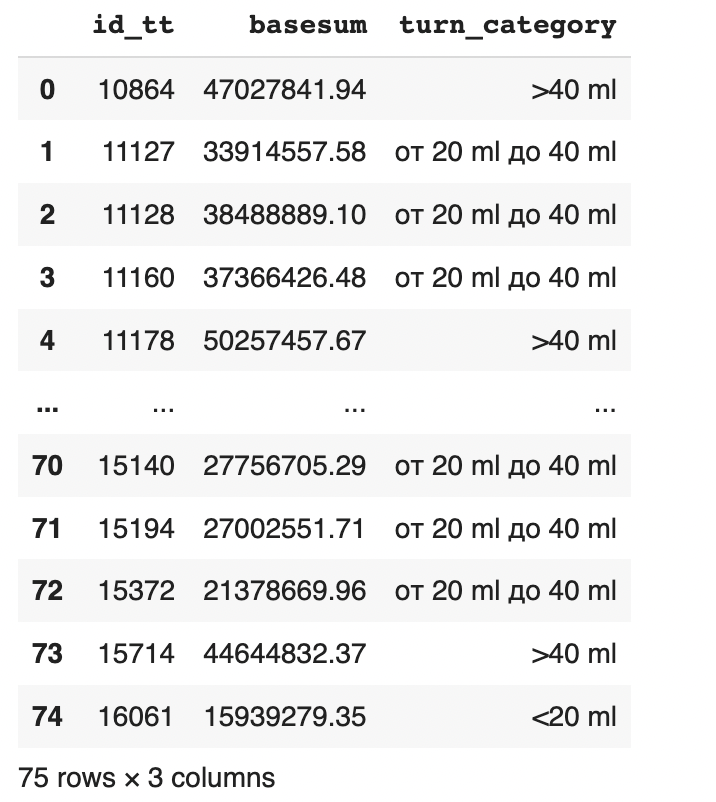

In [7]:
from IPython.display import Image
Image('bp2.png')

In [ ]:
#подгружаем категории оборота( поле turn_category) к таблице с точками
stores = pd.read_csv('/content/drive/MyDrive/Vkusville/svao_info.csv', sep=';')
stores = stores.merge(temp[['id_tt', 'turn_category']], on='id_tt', how='right')
stores

In [ ]:
#загружаем объединенную таблицу по счетам(февраль-май)
df2 = pd.read_csv('/content/drive/MyDrive/Vkusville/df2.csv')

In [ ]:
# добавляем поле с месяцем
df2['month'] = pd.to_datetime(df2['date_ch']).dt.month

In [ ]:
df2.query('month == 2')

In [ ]:
# считаем изменение выручки от месяца к месяцу ( март-май) и группируем в разрезе каждой тт
temp_growth = (
    df2.pivot_table(index='id_tt_cl',
                   columns='month',
                   values='basesum',
                   aggfunc='sum'
                   )
    .reset_index()
)
temp_growth['sales_4_perc'] = temp_growth[4] / temp_growth[3] - 1
temp_growth['sales_5_perc'] = temp_growth[5] / temp_growth[4] - 1

temp_growth['sales_total_perc']= temp_growth['sales_4_perc'] + temp_growth['sales_5_perc']

In [ ]:
# добавляем категоризацию (столбец growth_category) - <-4%, от -4% до 4% и >4%
def growth_category(row):
    if row['sales_total_perc'] >  0.04 : return '>4%'
    if row['sales_total_perc'] <= -0.04: return '<-4%'
    else: return 'от -4% до 4%'
temp_growth['growth_category'] = temp_growth.apply(growth_category, axis=1)
temp_growth

In [ ]:
#добавляем категорию роста к основному файлу с магазинами
temp_growth.rename(columns={'id_tt_cl' : 'id_tt'}, inplace=True)
stores = stores.merge(temp_growth[['id_tt', 'growth_category']], on='id_tt', how='right')
stores

In [ ]:
#подгружаем средний чек и среднее кол-во покупок
avg_bill = pd.read_csv('/content/drive/MyDrive/Vkusville/avg_bill.csv')
avg_buys = pd.read_csv('/content/drive/MyDrive/Vkusville/avg_buys.csv')

In [ ]:
avg_bill.rename(columns={'id_tt_cl': 'id_tt'}, inplace=True)
avg_buys.rename(columns={'id_tt_cl': 'id_tt'}, inplace=True)

In [ ]:
#подгружаем средние данные к файлу с магазинами
stores = stores.merge(avg_bill[['id_tt', 'avg_bill' ]], on='id_tt', how='left')
stores = stores.merge(avg_buys[['id_tt', 'avg_buys' ]], on='id_tt', how='left')

In [ ]:
#убираем категорию роста "от -4% до 4%" - она нам не нужна, ввиду маленькой разницы между магазинами. для ОБОИХ категорий: Вкусвилл и Шмель
temp = stores.query('(growth_category == "<-4%" or growth_category == ">4%" )')

temp

In [ ]:
#задаем график с разбивкой по объему
def graph(temp, group_category):
    plt.figure(figsize=(18,8))
    for position, turn in enumerate(temp['turn_category'].unique()):
        turn_category = turn
        temp_1=temp.query('turn_category == @turn_category')
        temp_1 = (
            temp_1.pivot_table(index='growth_category',
                             values=group_category,
                             aggfunc='mean')
            .reset_index()
        )
        plt.subplot(1,3, position +1)
        sns.barplot(data=temp_1, x='growth_category', y=group_category)
        plt.title(f'Turn category = {turn_category}, значение - {group_category}')
    plt.show()

In [ ]:
# средний чек
graph(temp, 'avg_bill')

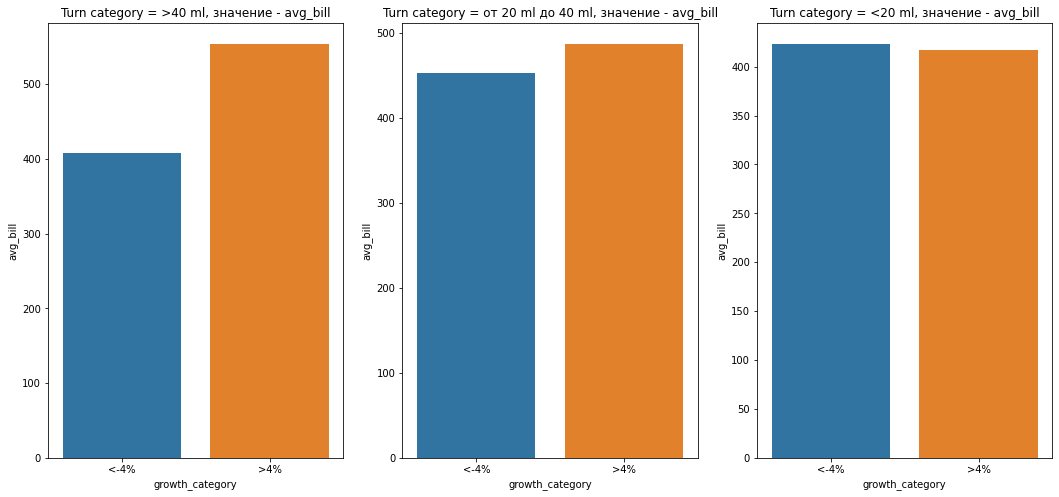

In [8]:
from IPython.display import Image
Image('bp3.png')

In [ ]:
# то же самое только в виде таблицы
temp_1 = (
            temp.pivot_table(index='growth_category',
                             columns='turn_category',
                             values='avg_buys',
                             aggfunc='mean')
            .reset_index()
        )
temp_1 

In [ ]:
# то же самое только в виде таблицы
temp_1 = (
            temp.pivot_table(index='growth_category',
                             columns='turn_category',
                             values='avg_bill',
                             aggfunc='mean')
            .reset_index()
        )
temp_1 